<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#PDC" data-toc-modified-id="PDC-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>PDC</a></span></li></ul></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Simple-LSTM" data-toc-modified-id="Simple-LSTM-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple-LSTM</a></span></li></ul></li></ul></div>

# Experiment 2

### PDC

In [1]:
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from sklearn.metrics import confusion_matrix
from pm4py.objects.petri_net.importer import importer as pn_importer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from mppn.imports import *
from mppn.preprocessing import *
from mppn.pipeline import *
from mppn.baselines import *

In [2]:
import pm4py
pm4py.__version__

'2.2.15'

In [3]:
pdc_models = {}
pdc_logs = {}

In [4]:
for net_path in os.listdir('data/pdc2020_models/Models/'):
    pdc_models[net_path[9:16]] = pn_importer.apply('data/pdc2020_models/Models/' + net_path)

In [5]:
for log_path in os.listdir('data/pdc2020_training/Training Logs/'):

    log = xes_importer.apply('data/pdc2020_training/Training Logs/' + log_path)
    df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)    
    
    df.rename({'concept:name':'activity','case:concept:name':'trace_id'},axis=1,inplace=True)
    df['event_id'] = df.groupby('trace_id').cumcount() 
    df['trace_id'] = df['trace_id'].str.split(' ').str[1]
    df.index = df.trace_id
    
    pdc_logs[log_path[9:16]] = df

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
list(pdc_models.keys()), list(pdc_logs.keys())

(['1100000',
  '1110010',
  '1100110',
  '1110100',
  '0001010',
  '0201000',
  '0010010',
  '1001100',
  '1001000',
  '0001000',
  '0100100',
  '1010100',
  '1001110',
  '0211110',
  '1101110',
  '1011000',
  '0111110',
  '1011100',
  '0210100',
  '0200000',
  '1000110',
  '0101010',
  '0210110',
  '1210110',
  '0211000',
  '1200100',
  '1101000',
  '1001010',
  '1201100',
  '1201000',
  '0100110',
  '0011000',
  '0200100',
  '0011010',
  '1010010',
  '0110110',
  '0211100',
  '1110110',
  '0101100',
  '1211010',
  '0010000',
  '0210000',
  '0000110',
  '0201010',
  '0101000',
  '0211010',
  '1111010',
  '0111010',
  '1101100',
  '1211100',
  '1011010',
  '1100010',
  '0111100',
  '1210000',
  '1000010',
  '1100100',
  '1000000',
  '0000100',
  '1111110',
  '1010000',
  '1201010',
  '1210010',
  '0110100',
  '1200010',
  '0000010',
  '0000000',
  '0011110',
  '0001110',
  '0111000',
  '1010110',
  '0110000',
  '1210100',
  '1101010',
  '1200000',
  '0110010',
  '0100010',
  '0201100',

In [7]:
pdc_names = pdc_models.keys()

In [8]:
import random
import networkx as nx
import re

class ModelBasedAssessment():
    def __init__(self, reach_graph):

        self.reachability_graph = reach_graph

        self.paths = None
        self.subpaths = None


    def get_start_state(self):
        """
        Get the first state, i.e. the starting state of the reachability graph.

        :return:
        """

        for s in self.reachability_graph.states:
            if s.incoming == set():
                return s

    def get_start_node(self):
        """
        Get the first node in the networkx graph

        :return:
        """
        start_state = self.get_start_state()
        return start_state.name

    def get_end_state(self):
        """
        Get the last state, i.e. the end state of the reachability graph.

        :return:
        """

        for s in self.reachability_graph.states:
            if s.outgoing == set():
                return s


    def indicator_function(self, y_hat, y):
        if y_hat in y:
            return 1
        else:
            return 0



    def compute_accuracy(self, prefixes, predictions):
        correct_pred = 0

        #Case where no path have been computed as reachability graph was to massive. Replay the prefix in the graph.
        if self.paths is None:
            start_state = self.get_start_state()

            for p_t, y_hat in zip(prefixes, predictions):
                gt = self.replay_prefix(p_t, start_state)
                #print(p_t, y_hat, gt)

                correct_pred += self.indicator_function(y_hat, gt)

        #If gt has been pre-computed.
        else:
            for p_t, y_hat in zip(prefixes, predictions):
                gt = self.ground_truth[tuple(p_t)]
                #print(y_hat, gt)
                correct_pred += self.indicator_function(y_hat, gt)

        accuracy = float(correct_pred/len(prefixes))

        return accuracy


    def replay_prefix(self, prefix, start_state):
        """
        Replay the prefix to collect the ground truth.
        Steps:
        - Walk the reachability graph with the activity names util reaching the final state(s).
        - All activates transitions from that state(s) form the ground truth which is returned.

        :param prefix:          The prefix, i.e., the unfinished case.
        :param start_state:     The state to start.

        :return:                A list of possible next steps to happen.
        """

        #print(f"\n\n---------------------------------\n{prefix}\n-----------------------------------\n\n")

        """Holds (current_state, reachable_state)"""
        states = [(start_state, start_state)]

        """Holds (state, enabled_transitions)"""
        enab_trans = self.get_enab_trans_from_state_set(states)

        if self.check_for_silent_trans(enab_trans):
            enab_trans, current_states = self.walk_silent_trans(enab_trans, states)

        for act_name in prefix:
            #print("\n")
            #print(f"Activity:                           {act_name}")
            #print(f"Current states:                     {states}")
            #print(f"Enabled transitions:                {enab_trans}")
            #print([t.name.split("'")[1] for (s, trans) in enab_trans for t in trans])

            #Check if trans is in the set of the directly reachable transitions
            if act_name in self.strip_trans_names(enab_trans):
                #Collect all next states, possible many as transition names can be ambignous in the petri nets
                states = []
                for (from_state, trans) in enab_trans:
                    for t in trans:
                        if t.name == act_name:
                            states.append((from_state, t.to_state))


                #Collect directly reachable transitions
                direct_trans = self.get_enab_trans_from_state_set(states)
                #print(direct_trans)

                if self.check_for_silent_trans(direct_trans):
                    enab_trans, states = self.walk_silent_trans(direct_trans, states)

                else:
                    enab_trans = direct_trans

            else:
                #raise ValueError(f"Cannot replay prefix {prefix}. {act_name} not in enabled transitions {enab_trans}")
                print(f"Cannot replay prefix {prefix}. {act_name} not in enabled transitions {enab_trans}")
                return []
        
        gt = self.strip_trans_names(enab_trans)
        #print(p_t, y_hat)
        #print(gt)
        #print("\n")

        return gt



    def walk_silent_trans(self, direct_trans, states):
        """
        Collect all states and transitions that can be reached from the current state by walking silent transitions.

        :param direct_trans:        Directly enabled transitions (s, t) without silent transitions.
        :param next_states:         Reachable states (s, s) from that transitions.
        :return:
        """

        def add_missing_transitions(old_trans, new_trans):
            for (st, tr) in new_trans:
                if st not in [s for (s, t) in old_trans]:
                    trans.append((st, tr))
                elif tr not in [t for (s, t) in old_trans]:
                    trans.append((st, tr))


        trans = direct_trans

        while self.check_for_silent_trans(trans):
            silent_trans = [(s, t) for (s, tr) in trans for t in tr if "n" in t.name]

            """Holds (state, to_state)"""
            new_states_from_silent = []
            for (s, t) in silent_trans:
                new_states_from_silent.append((s, t.to_state))

            new_trans = False
            for (from_state, to_state) in new_states_from_silent:
                if from_state not in [f for (f, t) in states]:
                    states.append((from_state, to_state))
                    new_trans = True
                elif to_state not in [t for (f, t) in states]:
                    states.append((from_state, to_state))
                    new_trans = True


            direct_trans = self.get_enab_trans_from_state_set(states)

            #Break the loop if no new transitions have been found
            if not new_trans:
                #print("No new states found.")
                add_missing_transitions(trans, direct_trans)
                break

            #Otherwise add the new transitions to the reachable ones
            else:
                add_missing_transitions(trans, direct_trans)
                #print(f"New state(s) found. Adding {trans}")

        return trans, states


    def check_for_silent_trans(self, trans):
        """
        Checks whether a silent transition is in trans. A silent transition is one with the pattern [n][number] in pm4py.
        :param trans:
        :return:
        """
        for (s, t) in trans:
            for transition in t:
                if re.search("^[n]+[\d]", transition.name):
                    return True

        return False

    def get_enab_trans_from_state_set(self, states):
        """
        Collect all reachable states from states as tuple (state, to_state).

        :param states:
        :return:
        """
        enab_trans = [(to_state, to_state.outgoing) for (from_state, to_state) in states]
        return enab_trans
    
    def strip_trans_names(self, enab_trans):
        """
        As we are only interested in the transition name we need to extract it.
        """
        return [t.name for (s, trans) in enab_trans for t in trans]        


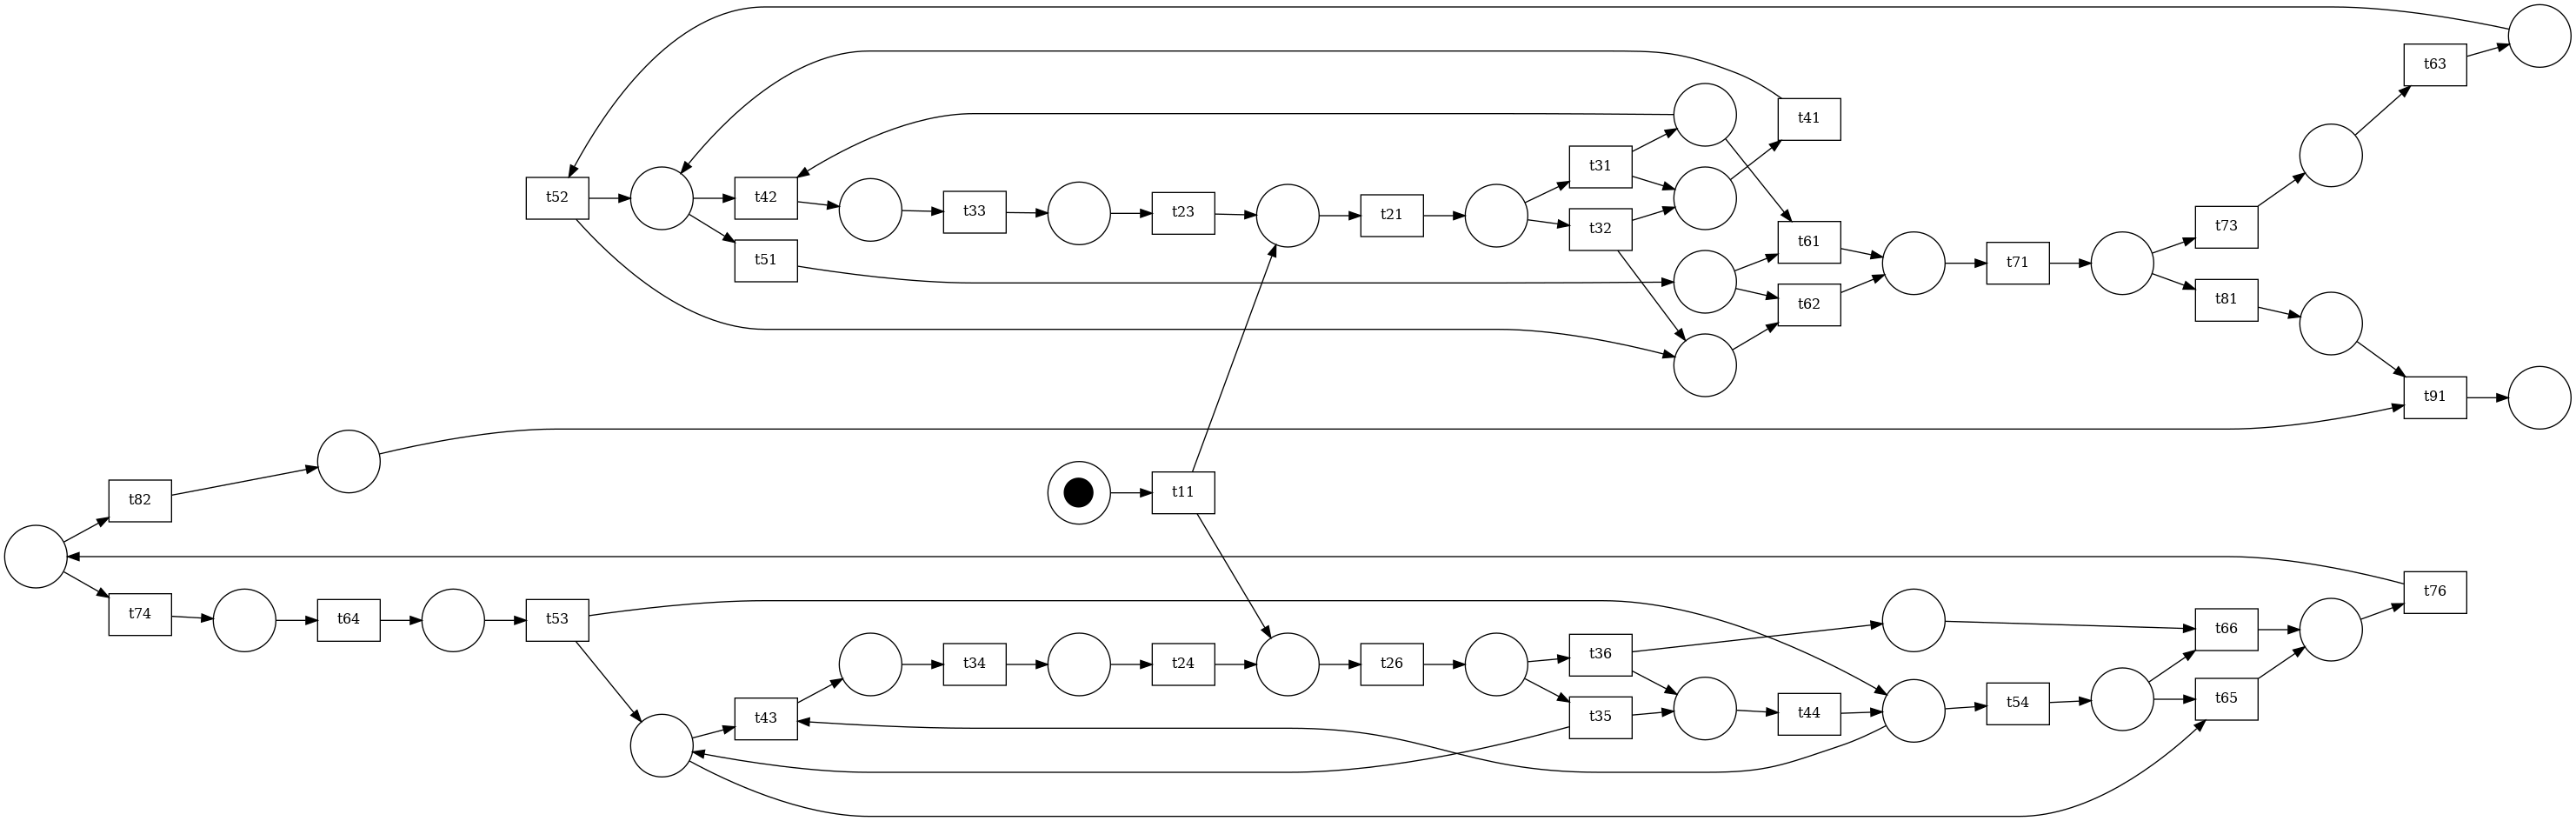

In [32]:
log = pdc_logs['1100000']
model = pdc_models['1100000']
reach = reachability_graph.construct_reachability_graph(model[0], model[1])
mba = ModelBasedAssessment(reach)

gviz = pn_visualizer.apply(model[0], model[1])
ts_visualizer.view(gviz)

In [37]:
mba.compute_accuracy(prefixes=[['t11', 't26']], predictions=['t36'])

1.0

In [38]:
mba.compute_accuracy(prefixes=[['t11', 't26']], predictions=['t44'])

0.0

In [39]:
mba.compute_accuracy(prefixes=[['t11', 't26'], ['t11', 't26']], predictions=['t44', 't36'])

0.5

## Deep Learning

In [24]:
seed = 99

In [25]:
class Simple_LSTM(torch.nn.Module) :
    def __init__(self, o) :
        super().__init__()
        hidden=25
        vocab_act=len(o.procs.categorify['activity'])
        emb_dim_act = int(vocab_act)+1
        self.emb_act = nn.Embedding(vocab_act,emb_dim_act)
        self.lstm_act = nn.LSTM(emb_dim_act, hidden, batch_first=True, num_layers=2)
        self.linear_act = nn.Linear(hidden, vocab_act)
        
    def forward(self, xcat):
        x_act = self.emb_act(xcat)
        x_act,_ = self.lstm_act(x_act)
        x_act = x_act[:,-1]
        x_act = self.linear_act(x_act)
        x_act = F.softmax(x_act,dim=1)

        return x_act

### Simple-LSTM

In [40]:
def training_loop(learn,epoch,print_output,lr):
    '''
    Basic training loop that uses learning rate finder and one cycle training.
    See fastai docs for more information
    '''
    learn.fit(epoch, lr)
    
    
def train_validate(dls,m,metrics=accuracy,loss=F.cross_entropy,epoch=20,print_output=True,model_dir=".",lr=5e-5,
                   output_index=1,patience=3,min_delta=0.005,show_plot=True,store_path='tmp',model_name='.model'):
    '''
    Trains a model on the training set with early stopping based on the validation loss.
    Afterwards, applies it to the test set.
    '''
    cbs = [CudaCallback,
      EarlyStoppingCallback(monitor='valid_loss',min_delta=min_delta, patience=patience),
      SaveModelCallback(fname=model_name)
      ]
    learn=Learner(dls, m, path=store_path, model_dir=model_dir, loss_func=loss ,metrics=metrics,cbs=cbs)

    if print_output:
        training_loop(learn,epoch,show_plot, lr=lr)
        return learn.validate(dl=dls[2])[output_index]
    else:
        with HideOutput(),learn.no_bar(),learn.no_logging():
            training_loop(learn,epoch,show_plot, lr=lr)
            return learn.validate(dl=dls[2])[output_index]

In [41]:
def decode_prefix(x):
    x_enc = []

    for pref in x:
        pref_enc = []
        for a in pref:
            #Skip the padding token
            if a != 0:
                pref_enc.append(v[a])

        if pref_enc != []:
            x_enc.append(pref_enc)
            
    return x_enc

In [45]:
pd_results = pd.DataFrame(columns=["Net", "Case-based Accuracy", "Model-based Accuracy"])

In [46]:
for name in pdc_names:
    log = pdc_logs[name]
    model = pdc_models[name]
    
    #gviz = pn_visualizer.apply(model[0], model[1])
    #ts_visualizer.view(gviz)
    
    splits = split_traces(log, validation_seed=seed, test_seed=seed)
    o = PPObj(log, [Categorify()], cat_names=['activity'], y_names='activity', splits=splits)
    #o.show(max_n=50)
    dls = o.get_dls(windows=partial(subsequences_fast,min_ws=0))
    xcat, y = dls.one_batch()
    
    pred_model = Simple_LSTM(o)
    
    cba_acc = train_validate(dls, pred_model, loss=F.cross_entropy, metrics=accuracy, epoch=20, lr=5e-3, print_output=True)
    
    p = pred_model(dls.valid_ds.inp[0].cuda())
    p = p.argmax(dim=1).cpu()
    y_valid = dls.valid_ds.inp[1][0].cpu()
    y_valid = y_valid.cpu().tolist()
    
    v = o.categorify['activity']
    y_enc = [v[a] for a in y_valid]
    
    x_valid = dls.valid_ds.inp[0].cpu()
    x_enc = decode_prefix(x_valid)
    
    reach = reachability_graph.construct_reachability_graph(model[0], model[1])
    
    mba = ModelBasedAssessment(reach)
    mba_acc = mba.compute_accuracy(x_enc, y_enc)
    
    row = pd.DataFrame.from_dict({"Net": [name],
                                    "Case-based Accuracy": [cba_acc],
                                    "Model-based Accuracy": [mba_acc]})
    pd_results = pd.concat([pd_results, row], ignore_index=True)
    print(pd_results)

    
    

epoch,train_loss,valid_loss,accuracy,time
0,3.179259,3.125557,0.431253,00:06
1,3.032570,3.023907,0.527540,00:06
2,3.032391,3.018466,0.529988,00:06
3,2.998214,2.982580,0.565891,00:06
4,2.997203,2.977151,0.569563,00:06
5,2.990565,2.974221,0.573643,00:06
6,2.971518,2.946388,0.603835,00:06
7,2.971338,2.937461,0.612811,00:06
8,2.946835,2.931458,0.617299,00:06
9,2.945280,2.935350,0.613627,00:06


Better model found at epoch 0 with valid_loss value: 3.125556707382202.
Better model found at epoch 1 with valid_loss value: 3.023906707763672.
Better model found at epoch 2 with valid_loss value: 3.018465995788574.
Better model found at epoch 3 with valid_loss value: 2.9825801849365234.
Better model found at epoch 4 with valid_loss value: 2.9771511554718018.
Better model found at epoch 5 with valid_loss value: 2.9742205142974854.
Better model found at epoch 6 with valid_loss value: 2.9463882446289062.
Better model found at epoch 7 with valid_loss value: 2.9374608993530273.
Better model found at epoch 8 with valid_loss value: 2.93145751953125.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.596644401550293.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,3.043307,2.943509,0.530636,00:05
1,2.889896,2.845130,0.619075,00:05
2,2.811834,2.800979,0.658960,00:05
3,2.808797,2.774920,0.684971,00:05
4,2.797488,2.773210,0.684971,00:05
5,2.775888,2.745613,0.712139,00:05
6,2.764126,2.729172,0.734104,00:05
7,2.758323,2.728850,0.734104,00:05
8,2.738233,2.723444,0.731792,00:04
9,2.742008,2.716563,0.747399,00:05


Better model found at epoch 0 with valid_loss value: 2.943509340286255.
Better model found at epoch 1 with valid_loss value: 2.845130205154419.
Better model found at epoch 2 with valid_loss value: 2.800978899002075.
Better model found at epoch 3 with valid_loss value: 2.7749197483062744.
Better model found at epoch 4 with valid_loss value: 2.773210048675537.
Better model found at epoch 5 with valid_loss value: 2.7456133365631104.
Better model found at epoch 6 with valid_loss value: 2.729172468185425.
Better model found at epoch 7 with valid_loss value: 2.7288503646850586.
Better model found at epoch 8 with valid_loss value: 2.7234442234039307.
Better model found at epoch 9 with valid_loss value: 2.7165634632110596.
Better model found at epoch 10 with valid_loss value: 2.7161786556243896.
Better model found at epoch 12 with valid_loss value: 2.7098774909973145.
No improvement since epoch 12: early stopping


Better model found at epoch 0 with valid_loss value: 0.7213155627250671.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,3.101776,3.045415,0.424346,00:06
1,2.937343,2.911833,0.551650,00:06
2,2.917510,2.904422,0.554222,00:06
3,2.914773,2.902447,0.556794,00:06
4,2.908834,2.897775,0.559794,00:06
5,2.905448,2.894063,0.565795,00:06
6,2.903577,2.893537,0.564081,00:06
7,2.912765,2.896095,0.562366,00:06


Better model found at epoch 0 with valid_loss value: 3.045414924621582.
Better model found at epoch 1 with valid_loss value: 2.911832571029663.
Better model found at epoch 2 with valid_loss value: 2.9044220447540283.
Better model found at epoch 3 with valid_loss value: 2.902447462081909.
Better model found at epoch 4 with valid_loss value: 2.8977749347686768.
Better model found at epoch 5 with valid_loss value: 2.8940629959106445.
Better model found at epoch 6 with valid_loss value: 2.8935368061065674.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.545378565788269.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,3.078407,3.049586,0.518160,00:05
1,2.951776,2.982423,0.572034,00:05
2,2.923654,2.970774,0.579298,00:04
3,2.917155,2.973219,0.576877,00:05
4,2.906054,2.944187,0.604722,00:05
5,2.888800,2.945527,0.602300,00:05
6,2.878766,2.924653,0.625303,00:04
7,2.869600,2.915624,0.634383,00:05
8,2.861375,2.917117,0.633172,00:05
9,2.862458,2.913436,0.636804,00:05


Better model found at epoch 0 with valid_loss value: 3.049586057662964.
Better model found at epoch 1 with valid_loss value: 2.9824228286743164.
Better model found at epoch 2 with valid_loss value: 2.970773696899414.
Better model found at epoch 4 with valid_loss value: 2.9441869258880615.
Better model found at epoch 6 with valid_loss value: 2.924652576446533.
Better model found at epoch 7 with valid_loss value: 2.9156243801116943.
Better model found at epoch 9 with valid_loss value: 2.913435935974121.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.6689326763153076.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.517511,2.475625,0.345455,00:02
1,2.412609,2.380216,0.444318,00:02
2,2.364638,2.369031,0.451136,00:02
3,2.352397,2.350859,0.472727,00:02
4,2.328386,2.351998,0.465909,00:02
5,2.321709,2.328861,0.492045,00:02
6,2.318683,2.334608,0.481818,00:02
7,2.316111,2.331082,0.487500,00:02
8,2.314365,2.332125,0.488636,00:02


Better model found at epoch 0 with valid_loss value: 2.4756252765655518.
Better model found at epoch 1 with valid_loss value: 2.380216121673584.
Better model found at epoch 2 with valid_loss value: 2.3690309524536133.
Better model found at epoch 3 with valid_loss value: 2.3508594036102295.
Better model found at epoch 5 with valid_loss value: 2.3288607597351074.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.47409090399742126.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.944251,2.911423,0.381901,00:06
1,2.829440,2.832254,0.456206,00:06
2,2.814312,2.803224,0.488169,00:05
3,2.795270,2.780987,0.507264,00:06
4,2.788814,2.784313,0.503113,00:06
5,2.772475,2.769195,0.520133,00:06
6,2.777977,2.764318,0.523869,00:06
7,2.768737,2.765653,0.520133,00:06
8,2.772806,2.762156,0.524699,00:05
9,2.766480,2.760242,0.525529,00:06


Better model found at epoch 0 with valid_loss value: 2.9114229679107666.
Better model found at epoch 1 with valid_loss value: 2.8322536945343018.
Better model found at epoch 2 with valid_loss value: 2.8032236099243164.
Better model found at epoch 3 with valid_loss value: 2.7809865474700928.
Better model found at epoch 5 with valid_loss value: 2.769195318222046.
Better model found at epoch 6 with valid_loss value: 2.764317750930786.
Better model found at epoch 8 with valid_loss value: 2.762155771255493.
Better model found at epoch 9 with valid_loss value: 2.760241985321045.
Better model found at epoch 10 with valid_loss value: 2.7574024200439453.
Better model found at epoch 11 with valid_loss value: 2.755882501602173.
No improvement since epoch 11: early stopping


Better model found at epoch 0 with valid_loss value: 0.502810001373291.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0
5  0201000             0.502810                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.720185,2.611344,0.460910,00:02
1,2.568200,2.550265,0.483081,00:02
2,2.461923,2.423272,0.619603,00:02
3,2.394966,2.401499,0.633606,00:02
4,2.359060,2.380687,0.654609,00:02
5,2.342274,2.374764,0.660443,00:02
6,2.344228,2.367567,0.666278,00:02
7,2.341150,2.367044,0.666278,00:02
8,2.339121,2.364966,0.667445,00:02
9,2.335383,2.366529,0.665111,00:02


Better model found at epoch 0 with valid_loss value: 2.6113440990448.
Better model found at epoch 1 with valid_loss value: 2.550264835357666.
Better model found at epoch 2 with valid_loss value: 2.423272132873535.
Better model found at epoch 3 with valid_loss value: 2.401499032974243.
Better model found at epoch 4 with valid_loss value: 2.3806865215301514.
Better model found at epoch 5 with valid_loss value: 2.3747639656066895.
Better model found at epoch 6 with valid_loss value: 2.3675665855407715.
Better model found at epoch 7 with valid_loss value: 2.3670437335968018.
Better model found at epoch 8 with valid_loss value: 2.3649656772613525.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.69580078125.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0
5  0201000             0.502810                   1.0
6  0010010             0.695801                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.678535,2.597883,0.371505,00:02
1,2.553846,2.506893,0.444740,00:02
2,2.495957,2.466074,0.472703,00:02
3,2.457594,2.455945,0.474035,00:02
4,2.445992,2.446715,0.480692,00:02
5,2.442258,2.444860,0.483356,00:02
6,2.434741,2.437855,0.495340,00:02
7,2.429880,2.434098,0.496671,00:02
8,2.410312,2.419248,0.508655,00:02
9,2.400239,2.404807,0.527297,00:02


Better model found at epoch 0 with valid_loss value: 2.5978827476501465.
Better model found at epoch 1 with valid_loss value: 2.5068931579589844.
Better model found at epoch 2 with valid_loss value: 2.466073989868164.
Better model found at epoch 3 with valid_loss value: 2.455944776535034.
Better model found at epoch 4 with valid_loss value: 2.4467153549194336.
Better model found at epoch 5 with valid_loss value: 2.4448604583740234.
Better model found at epoch 6 with valid_loss value: 2.4378552436828613.
Better model found at epoch 7 with valid_loss value: 2.4340975284576416.
Better model found at epoch 8 with valid_loss value: 2.41924786567688.
Better model found at epoch 9 with valid_loss value: 2.4048073291778564.
Better model found at epoch 11 with valid_loss value: 2.4025866985321045.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.5389507412910461.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0
5  0201000             0.502810                   1.0
6  0010010             0.695801                   1.0
7  1001100             0.538951                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.627141,2.561081,0.378409,00:02
1,2.518224,2.496491,0.443182,00:02
2,2.462717,2.434707,0.505682,00:02
3,2.422573,2.414943,0.525000,00:02
4,2.390365,2.385377,0.555682,00:02
5,2.379239,2.388686,0.550000,00:02
6,2.374616,2.386563,0.540909,00:02
7,2.368275,2.388789,0.537500,00:02


Better model found at epoch 0 with valid_loss value: 2.5610806941986084.
Better model found at epoch 1 with valid_loss value: 2.4964911937713623.
Better model found at epoch 2 with valid_loss value: 2.4347071647644043.
Better model found at epoch 3 with valid_loss value: 2.414942502975464.
Better model found at epoch 4 with valid_loss value: 2.3853774070739746.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.5381818413734436.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0
5  0201000             0.502810                   1.0
6  0010010             0.695801                   1.0
7  1001100             0.538951                   1.0
8  1001000             0.538182                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.614093,2.537737,0.415909,00:03
1,2.521903,2.516219,0.417045,00:02
2,2.479042,2.471230,0.464773,00:02
3,2.457414,2.456501,0.477273,00:02
4,2.445907,2.450889,0.480682,00:02
5,2.443305,2.450110,0.480682,00:02
6,2.441862,2.443420,0.481818,00:02
7,2.422478,2.442192,0.484091,00:02
8,2.418911,2.441314,0.488636,00:02
9,2.418566,2.432544,0.497727,00:02


Better model found at epoch 0 with valid_loss value: 2.537736654281616.
Better model found at epoch 1 with valid_loss value: 2.5162193775177.
Better model found at epoch 2 with valid_loss value: 2.4712297916412354.
Better model found at epoch 3 with valid_loss value: 2.4565012454986572.
Better model found at epoch 4 with valid_loss value: 2.4508893489837646.
Better model found at epoch 5 with valid_loss value: 2.4501099586486816.
Better model found at epoch 6 with valid_loss value: 2.44342041015625.
Better model found at epoch 7 with valid_loss value: 2.442192316055298.
Better model found at epoch 8 with valid_loss value: 2.4413135051727295.
Better model found at epoch 9 with valid_loss value: 2.432543992996216.
Better model found at epoch 10 with valid_loss value: 2.431952714920044.
Better model found at epoch 11 with valid_loss value: 2.429915189743042.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.5068181753158569.
       Net  Case-based Accuracy  Model-based Accuracy
0  1100000             0.596644                   1.0
1  1110010             0.721316                   1.0
2  1100110             0.545379                   1.0
3  1110100             0.668933                   1.0
4  0001010             0.474091                   1.0
5  0201000             0.502810                   1.0
6  0010010             0.695801                   1.0
7  1001100             0.538951                   1.0
8  1001000             0.538182                   1.0
9  0001000             0.506818                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,3.231566,3.212553,0.348904,00:05
1,3.053534,3.068746,0.487131,00:06
2,3.035776,3.049297,0.500953,00:06
3,3.028152,3.043082,0.506673,00:06
4,3.024018,3.038335,0.513823,00:06
5,3.010609,3.036891,0.515253,00:06
6,3.000961,3.039073,0.510486,00:06
7,2.997736,3.025646,0.522879,00:06
8,2.995451,3.024078,0.526215,00:06
9,2.990008,3.025393,0.522879,00:06


Better model found at epoch 0 with valid_loss value: 3.212552547454834.
Better model found at epoch 1 with valid_loss value: 3.068746328353882.
Better model found at epoch 2 with valid_loss value: 3.049297332763672.
Better model found at epoch 3 with valid_loss value: 3.043081760406494.
Better model found at epoch 4 with valid_loss value: 3.038334846496582.
Better model found at epoch 5 with valid_loss value: 3.0368905067443848.
Better model found at epoch 7 with valid_loss value: 3.0256459712982178.
Better model found at epoch 8 with valid_loss value: 3.024077892303467.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5455749034881592.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.827178,2.731910,0.399460,00:02
1,2.647006,2.588357,0.545209,00:02
2,2.567393,2.542722,0.585695,00:02
3,2.543228,2.539685,0.585695,00:02
4,2.542521,2.540525,0.584345,00:02
5,2.534293,2.539266,0.585695,00:02


Better model found at epoch 0 with valid_loss value: 2.731909990310669.
Better model found at epoch 1 with valid_loss value: 2.588357448577881.
Better model found at epoch 2 with valid_loss value: 2.54272198677063.
Better model found at epoch 3 with valid_loss value: 2.5396852493286133.
No improvement since epoch 2: early stopping


Better model found at epoch 0 with valid_loss value: 0.5670995712280273.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.577878,2.524267,0.308411,00:02
1,2.467472,2.413607,0.425901,00:02
2,2.370275,2.322694,0.516689,00:02
3,2.317193,2.284794,0.535380,00:02
4,2.292435,2.278057,0.539386,00:02
5,2.292822,2.279977,0.539386,00:02
6,2.289014,2.273728,0.544726,00:02
7,2.291092,2.276000,0.540721,00:02


Better model found at epoch 0 with valid_loss value: 2.5242669582366943.
Better model found at epoch 1 with valid_loss value: 2.413606882095337.
Better model found at epoch 2 with valid_loss value: 2.3226940631866455.
Better model found at epoch 3 with valid_loss value: 2.284794330596924.
Better model found at epoch 4 with valid_loss value: 2.278057098388672.
Better model found at epoch 6 with valid_loss value: 2.273728370666504.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.5126315951347351.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.838219,2.765121,0.469586,00:05
1,2.733383,2.726736,0.481144,00:05
2,2.716340,2.693976,0.522506,00:05
3,2.669046,2.661027,0.547445,00:05
4,2.666050,2.657116,0.549270,00:05
5,2.657946,2.657122,0.550487,00:05
6,2.656313,2.652084,0.555961,00:05
7,2.665234,2.651473,0.557178,00:05
8,2.665367,2.650968,0.552920,00:05
9,2.662249,2.651078,0.555961,00:05


Better model found at epoch 0 with valid_loss value: 2.7651212215423584.
Better model found at epoch 1 with valid_loss value: 2.726736068725586.
Better model found at epoch 2 with valid_loss value: 2.6939756870269775.
Better model found at epoch 3 with valid_loss value: 2.661027193069458.
Better model found at epoch 4 with valid_loss value: 2.6571156978607178.
Better model found at epoch 6 with valid_loss value: 2.6520843505859375.
Better model found at epoch 7 with valid_loss value: 2.651472568511963.
Better model found at epoch 8 with valid_loss value: 2.650968074798584.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.5380577445030212.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.808939,2.769567,0.437249,00:05
1,2.667593,2.651648,0.561605,00:05
2,2.645436,2.630409,0.581662,00:05
3,2.638819,2.626283,0.584527,00:05
4,2.632519,2.623000,0.585100,00:05
5,2.634849,2.623606,0.583381,00:05
6,2.624815,2.618243,0.590831,00:05
7,2.623162,2.615721,0.593123,00:05
8,2.638847,2.623168,0.584527,00:05
9,2.628955,2.611244,0.593696,00:05


Better model found at epoch 0 with valid_loss value: 2.7695672512054443.
Better model found at epoch 1 with valid_loss value: 2.6516475677490234.
Better model found at epoch 2 with valid_loss value: 2.630408525466919.
Better model found at epoch 3 with valid_loss value: 2.6262834072113037.
Better model found at epoch 4 with valid_loss value: 2.622999906539917.
Better model found at epoch 6 with valid_loss value: 2.6182425022125244.
Better model found at epoch 7 with valid_loss value: 2.6157214641571045.
Better model found at epoch 9 with valid_loss value: 2.6112444400787354.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5833509564399719.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0


epoch,train_loss,valid_loss,accuracy,time
0,2.710369,2.608846,0.437722,00:02
1,2.514844,2.425279,0.519573,00:02
2,2.445080,2.411502,0.517794,00:02
3,2.421753,2.397327,0.526690,00:02
4,2.395210,2.364761,0.558719,00:02
5,2.354136,2.305420,0.653025,00:02
6,2.292005,2.234391,0.708185,00:02
7,2.237867,2.205854,0.731317,00:02
8,2.216005,2.198605,0.736655,00:02
9,2.208304,2.193465,0.738434,00:02


Better model found at epoch 0 with valid_loss value: 2.6088459491729736.
Better model found at epoch 1 with valid_loss value: 2.425278902053833.
Better model found at epoch 2 with valid_loss value: 2.4115021228790283.
Better model found at epoch 3 with valid_loss value: 2.397326707839966.
Better model found at epoch 4 with valid_loss value: 2.3647608757019043.
Better model found at epoch 5 with valid_loss value: 2.305419683456421.
Better model found at epoch 6 with valid_loss value: 2.2343909740448.
Better model found at epoch 7 with valid_loss value: 2.2058541774749756.
Better model found at epoch 8 with valid_loss value: 2.1986048221588135.
Better model found at epoch 9 with valid_loss value: 2.193464517593384.
Better model found at epoch 11 with valid_loss value: 2.1876511573791504.
No improvement since epoch 11: early stopping


Better model found at epoch 0 with valid_loss value: 0.7324888110160828.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.824817,2.805638,0.407028,00:04
1,2.716059,2.743565,0.467057,00:04
2,2.665144,2.664405,0.546120,00:04
3,2.586882,2.600487,0.612006,00:04
4,2.571420,2.592233,0.617862,00:04
5,2.557966,2.589839,0.620791,00:04
6,2.565682,2.589007,0.620059,00:04
7,2.564919,2.590747,0.617130,00:04


Better model found at epoch 0 with valid_loss value: 2.805638074874878.
Better model found at epoch 1 with valid_loss value: 2.743565320968628.
Better model found at epoch 2 with valid_loss value: 2.6644046306610107.
Better model found at epoch 3 with valid_loss value: 2.600486993789673.
Better model found at epoch 4 with valid_loss value: 2.5922327041625977.
Better model found at epoch 5 with valid_loss value: 2.589838981628418.
Better model found at epoch 6 with valid_loss value: 2.5890071392059326.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6397727131843567.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.677365,2.548501,0.471491,00:02
1,2.500232,2.436411,0.508772,00:02
2,2.422317,2.356349,0.589912,00:02
3,2.364951,2.335953,0.598684,00:02
4,2.333513,2.309474,0.631579,00:02
5,2.323952,2.307087,0.629386,00:02
6,2.312470,2.304795,0.618421,00:02
7,2.308410,2.309486,0.616228,00:02


Better model found at epoch 0 with valid_loss value: 2.548501491546631.
Better model found at epoch 1 with valid_loss value: 2.4364113807678223.
Better model found at epoch 2 with valid_loss value: 2.356349229812622.
Better model found at epoch 3 with valid_loss value: 2.3359534740448.
Better model found at epoch 4 with valid_loss value: 2.309474229812622.
Better model found at epoch 5 with valid_loss value: 2.3070871829986572.
Better model found at epoch 6 with valid_loss value: 2.304795026779175.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6196615695953369.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.211316,3.146791,0.524554,00:05
1,3.110271,3.109995,0.549665,00:05
2,3.085325,3.095616,0.563616,00:05
3,3.062632,3.070779,0.588170,00:05
4,3.045282,3.061215,0.597656,00:05
5,3.045794,3.059658,0.597656,00:05
6,3.034468,3.041735,0.615513,00:05
7,3.023737,3.041598,0.616629,00:05
8,3.012679,3.039955,0.617746,00:05
9,3.026406,3.037249,0.622210,00:05


Better model found at epoch 0 with valid_loss value: 3.1467909812927246.
Better model found at epoch 1 with valid_loss value: 3.109994888305664.
Better model found at epoch 2 with valid_loss value: 3.095616102218628.
Better model found at epoch 3 with valid_loss value: 3.0707790851593018.
Better model found at epoch 4 with valid_loss value: 3.0612149238586426.
Better model found at epoch 5 with valid_loss value: 3.0596582889556885.
Better model found at epoch 6 with valid_loss value: 3.0417346954345703.
Better model found at epoch 7 with valid_loss value: 3.041597604751587.
Better model found at epoch 8 with valid_loss value: 3.0399551391601562.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6158563494682312.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.291821,3.242616,0.426357,00:05
1,3.181958,3.144460,0.524747,00:05
2,3.142058,3.123181,0.539058,00:05
3,3.120122,3.113204,0.549791,00:05
4,3.120539,3.108139,0.551580,00:05
5,3.112526,3.108665,0.551580,00:05
6,3.100405,3.103747,0.555158,00:05
7,3.101222,3.104730,0.553369,00:05


Better model found at epoch 0 with valid_loss value: 3.2426164150238037.
Better model found at epoch 1 with valid_loss value: 3.144460439682007.
Better model found at epoch 2 with valid_loss value: 3.1231813430786133.
Better model found at epoch 3 with valid_loss value: 3.113203525543213.
Better model found at epoch 4 with valid_loss value: 3.1081387996673584.
Better model found at epoch 6 with valid_loss value: 3.1037471294403076.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.5368490815162659.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.684478,2.621763,0.427239,00:03
1,2.600409,2.559681,0.493470,00:03
2,2.543962,2.519899,0.517724,00:03
3,2.524686,2.502471,0.531716,00:03
4,2.503707,2.492531,0.541978,00:03
5,2.492764,2.501455,0.529851,00:03
6,2.490664,2.491142,0.540112,00:03
7,2.484521,2.486832,0.547575,00:03
8,2.470392,2.499779,0.532649,00:03
9,2.468161,2.492070,0.541045,00:03


Better model found at epoch 0 with valid_loss value: 2.621763229370117.
Better model found at epoch 1 with valid_loss value: 2.5596811771392822.
Better model found at epoch 2 with valid_loss value: 2.5198986530303955.
Better model found at epoch 3 with valid_loss value: 2.5024712085723877.
Better model found at epoch 4 with valid_loss value: 2.4925308227539062.
Better model found at epoch 6 with valid_loss value: 2.4911415576934814.
Better model found at epoch 7 with valid_loss value: 2.4868321418762207.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5397599339485168.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.799999,2.746448,0.477174,00:05
1,2.699703,2.696026,0.518020,00:05
2,2.649043,2.654180,0.559827,00:05
3,2.640738,2.636531,0.572321,00:05
4,2.612664,2.629608,0.579529,00:05
5,2.623892,2.627511,0.582893,00:05
6,2.614732,2.626841,0.580490,00:05
7,2.617146,2.620251,0.588179,00:05
8,2.606794,2.623106,0.586257,00:05
9,2.603706,2.623436,0.580010,00:05


Better model found at epoch 0 with valid_loss value: 2.746448278427124.
Better model found at epoch 1 with valid_loss value: 2.69602632522583.
Better model found at epoch 2 with valid_loss value: 2.654179573059082.
Better model found at epoch 3 with valid_loss value: 2.636531114578247.
Better model found at epoch 4 with valid_loss value: 2.629607677459717.
Better model found at epoch 5 with valid_loss value: 2.6275112628936768.
Better model found at epoch 6 with valid_loss value: 2.626840591430664.
Better model found at epoch 7 with valid_loss value: 2.620251417160034.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5950639843940735.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.139602,3.062238,0.502652,00:05
1,3.033788,3.007755,0.549794,00:05
2,2.968260,2.946048,0.606953,00:05
3,2.936943,2.924300,0.628757,00:05
4,2.930764,2.932748,0.618739,00:05
5,2.916313,2.928000,0.622864,00:05
6,2.929302,2.923992,0.624042,00:05


Better model found at epoch 0 with valid_loss value: 3.0622384548187256.
Better model found at epoch 1 with valid_loss value: 3.0077550411224365.
Better model found at epoch 2 with valid_loss value: 2.9460484981536865.
Better model found at epoch 3 with valid_loss value: 2.924299955368042.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.6216088533401489.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.100260,3.065472,0.508134,00:05
1,2.955803,2.960801,0.596529,00:05
2,2.920719,2.939176,0.613341,00:05
3,2.894817,2.920864,0.627440,00:05
4,2.882070,2.918365,0.631779,00:05
5,2.881890,2.918889,0.629067,00:05
6,2.880084,2.920793,0.626898,00:05


Better model found at epoch 0 with valid_loss value: 3.06547212600708.
Better model found at epoch 1 with valid_loss value: 2.9608006477355957.
Better model found at epoch 2 with valid_loss value: 2.939175605773926.
Better model found at epoch 3 with valid_loss value: 2.9208641052246094.
Better model found at epoch 4 with valid_loss value: 2.918365240097046.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.6619718074798584.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.850040,2.798986,0.497875,00:05
1,2.753888,2.755359,0.530662,00:05
2,2.714385,2.730791,0.556770,00:05
3,2.722141,2.731477,0.556770,00:05
4,2.715769,2.727231,0.557377,00:05
5,2.695427,2.714684,0.565877,00:05
6,2.697499,2.713928,0.571342,00:05
7,2.689183,2.713086,0.570735,00:05
8,2.685657,2.710320,0.578021,00:05


Better model found at epoch 0 with valid_loss value: 2.7989864349365234.
Better model found at epoch 1 with valid_loss value: 2.755359172821045.
Better model found at epoch 2 with valid_loss value: 2.730790615081787.
Better model found at epoch 4 with valid_loss value: 2.7272307872772217.
Better model found at epoch 5 with valid_loss value: 2.714684247970581.
Better model found at epoch 6 with valid_loss value: 2.713927984237671.
Better model found at epoch 7 with valid_loss value: 2.713085651397705.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.5829518437385559.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.281441,3.270498,0.395391,00:05
1,3.162848,3.157566,0.502937,00:05
2,3.121721,3.128464,0.534117,00:05
3,3.104625,3.122607,0.536376,00:05
4,3.106213,3.119173,0.537732,00:05
5,3.117747,3.125863,0.531857,00:05
6,3.100991,3.121608,0.535924,00:05


Better model found at epoch 0 with valid_loss value: 3.2704977989196777.
Better model found at epoch 1 with valid_loss value: 3.1575660705566406.
Better model found at epoch 2 with valid_loss value: 3.1284642219543457.
Better model found at epoch 3 with valid_loss value: 3.122607469558716.
Better model found at epoch 4 with valid_loss value: 3.1191725730895996.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.5446194410324097.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.878604,2.863102,0.428641,00:05
1,2.786390,2.765937,0.543299,00:05
2,2.702049,2.703336,0.584906,00:05
3,2.689447,2.694653,0.594098,00:05
4,2.669300,2.664082,0.621190,00:05
5,2.665204,2.659898,0.624577,00:05
6,2.662029,2.657370,0.627963,00:05
7,2.665389,2.654310,0.629898,00:05
8,2.669738,2.653778,0.630382,00:05
9,2.661873,2.654478,0.630866,00:05


Better model found at epoch 0 with valid_loss value: 2.8631021976470947.
Better model found at epoch 1 with valid_loss value: 2.765936851501465.
Better model found at epoch 2 with valid_loss value: 2.703336477279663.
Better model found at epoch 3 with valid_loss value: 2.694652557373047.
Better model found at epoch 4 with valid_loss value: 2.6640822887420654.
Better model found at epoch 5 with valid_loss value: 2.659897565841675.
Better model found at epoch 6 with valid_loss value: 2.6573703289031982.
Better model found at epoch 7 with valid_loss value: 2.6543095111846924.
Better model found at epoch 8 with valid_loss value: 2.653777837753296.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6208886504173279.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.540592,2.466213,0.381818,00:02
1,2.426073,2.401260,0.420455,00:02
2,2.393665,2.397708,0.414773,00:02
3,2.365448,2.343121,0.477273,00:02
4,2.303455,2.276080,0.545455,00:02
5,2.274347,2.276840,0.546591,00:02
6,2.275237,2.269872,0.547727,00:02
7,2.272727,2.265804,0.553409,00:02
8,2.271345,2.260788,0.556818,00:02
9,2.271032,2.261130,0.559091,00:02


Better model found at epoch 0 with valid_loss value: 2.466212511062622.
Better model found at epoch 1 with valid_loss value: 2.401259660720825.
Better model found at epoch 2 with valid_loss value: 2.3977084159851074.
Better model found at epoch 3 with valid_loss value: 2.343120813369751.
Better model found at epoch 4 with valid_loss value: 2.2760801315307617.
Better model found at epoch 6 with valid_loss value: 2.269871950149536.
Better model found at epoch 7 with valid_loss value: 2.265803813934326.
Better model found at epoch 8 with valid_loss value: 2.2607877254486084.
Better model found at epoch 10 with valid_loss value: 2.259011745452881.
Better model found at epoch 11 with valid_loss value: 2.2358832359313965.
No improvement since epoch 11: early stopping


Better model found at epoch 0 with valid_loss value: 0.5654545426368713.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.923957,2.879486,0.420440,00:06
1,2.787751,2.792288,0.495472,00:06
2,2.790052,2.789569,0.498060,00:06
3,2.784738,2.776190,0.509702,00:06
4,2.768382,2.780772,0.504097,00:06
5,2.760690,2.768818,0.517464,00:06
6,2.759647,2.761048,0.526089,00:06
7,2.754609,2.768197,0.517464,00:06
8,2.757748,2.764005,0.521345,00:06
9,2.746202,2.747235,0.539888,00:05


Better model found at epoch 0 with valid_loss value: 2.879486083984375.
Better model found at epoch 1 with valid_loss value: 2.792287826538086.
Better model found at epoch 2 with valid_loss value: 2.789569139480591.
Better model found at epoch 3 with valid_loss value: 2.7761900424957275.
Better model found at epoch 5 with valid_loss value: 2.7688183784484863.
Better model found at epoch 6 with valid_loss value: 2.761047601699829.
Better model found at epoch 9 with valid_loss value: 2.747234582901001.
Better model found at epoch 11 with valid_loss value: 2.7468976974487305.
Better model found at epoch 12 with valid_loss value: 2.7359354496002197.
Better model found at epoch 14 with valid_loss value: 2.7358877658843994.
No improvement since epoch 12: early stopping


Better model found at epoch 0 with valid_loss value: 0.5537603497505188.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.916456,2.856380,0.452295,00:06
1,2.818747,2.792810,0.501800,00:06
2,2.796419,2.763615,0.523402,00:06
3,2.748721,2.726487,0.561656,00:06
4,2.737468,2.730342,0.557156,00:06
5,2.737008,2.729988,0.554905,00:06
6,2.738854,2.734128,0.547705,00:06


Better model found at epoch 0 with valid_loss value: 2.8563802242279053.
Better model found at epoch 1 with valid_loss value: 2.7928102016448975.
Better model found at epoch 2 with valid_loss value: 2.7636146545410156.
Better model found at epoch 3 with valid_loss value: 2.726486921310425.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.5444049835205078.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.076183,3.048964,0.415801,00:06
1,2.989532,2.970838,0.492099,00:06
2,2.973305,2.953486,0.507449,00:06
3,2.942356,2.922923,0.538149,00:06
4,2.937675,2.920030,0.541761,00:06
5,2.926650,2.912219,0.545372,00:06
6,2.923299,2.904940,0.554402,00:06
7,2.925638,2.905233,0.555305,00:06
8,2.911434,2.904714,0.554853,00:06
9,2.916817,2.900541,0.560722,00:06


Better model found at epoch 0 with valid_loss value: 3.0489635467529297.
Better model found at epoch 1 with valid_loss value: 2.9708375930786133.
Better model found at epoch 2 with valid_loss value: 2.953486442565918.
Better model found at epoch 3 with valid_loss value: 2.9229228496551514.
Better model found at epoch 4 with valid_loss value: 2.920029878616333.
Better model found at epoch 5 with valid_loss value: 2.912219285964966.
Better model found at epoch 6 with valid_loss value: 2.904939889907837.
Better model found at epoch 8 with valid_loss value: 2.9047141075134277.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.5412811636924744.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.660015,2.483318,0.505455,00:02
1,2.467343,2.396680,0.530909,00:02
2,2.373591,2.290002,0.658182,00:02
3,2.318450,2.271800,0.660000,00:02
4,2.293661,2.271546,0.652727,00:02
5,2.280503,2.261383,0.660000,00:02
6,2.276535,2.256996,0.670909,00:02
7,2.270395,2.258127,0.669091,00:02
8,2.263402,2.260659,0.672727,00:02


Better model found at epoch 0 with valid_loss value: 2.4833176136016846.
Better model found at epoch 1 with valid_loss value: 2.3966803550720215.
Better model found at epoch 2 with valid_loss value: 2.2900021076202393.
Better model found at epoch 3 with valid_loss value: 2.2718000411987305.
Better model found at epoch 4 with valid_loss value: 2.271545648574829.
Better model found at epoch 5 with valid_loss value: 2.261383056640625.
Better model found at epoch 6 with valid_loss value: 2.2569963932037354.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.6598591804504395.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.359982,3.333660,0.323786,00:05
1,3.264400,3.242512,0.422816,00:05
2,3.215818,3.213906,0.442718,00:05
3,3.210855,3.203906,0.453883,00:05
4,3.162597,3.171755,0.488350,00:05
5,3.158463,3.168297,0.488350,00:05
6,3.161565,3.151606,0.507767,00:05
7,3.145779,3.154277,0.503883,00:05
8,3.149342,3.135544,0.522816,00:05
9,3.139163,3.131042,0.526214,00:05


Better model found at epoch 0 with valid_loss value: 3.333660125732422.
Better model found at epoch 1 with valid_loss value: 3.2425122261047363.
Better model found at epoch 2 with valid_loss value: 3.2139058113098145.
Better model found at epoch 3 with valid_loss value: 3.2039060592651367.
Better model found at epoch 4 with valid_loss value: 3.171754837036133.
Better model found at epoch 5 with valid_loss value: 3.168297052383423.
Better model found at epoch 6 with valid_loss value: 3.1516060829162598.
Better model found at epoch 8 with valid_loss value: 3.1355443000793457.
Better model found at epoch 9 with valid_loss value: 3.131042242050171.
Better model found at epoch 11 with valid_loss value: 3.1305336952209473.
Better model found at epoch 12 with valid_loss value: 3.1295952796936035.
Better model found at epoch 13 with valid_loss value: 3.1220288276672363.
Better model found at epoch 15 with valid_loss value: 3.1193594932556152.
No improvement since epoch 13: early stopping


Better model found at epoch 0 with valid_loss value: 0.5254948735237122.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.561255,2.475404,0.375427,00:02
1,2.432320,2.373375,0.488055,00:02
2,2.295683,2.259022,0.564846,00:02
3,2.210966,2.221390,0.602389,00:02
4,2.170374,2.203462,0.617747,00:02
5,2.164442,2.202928,0.616041,00:02
6,2.154502,2.207555,0.614334,00:02
7,2.151658,2.200817,0.616041,00:02


Better model found at epoch 0 with valid_loss value: 2.4754042625427246.
Better model found at epoch 1 with valid_loss value: 2.3733747005462646.
Better model found at epoch 2 with valid_loss value: 2.2590222358703613.
Better model found at epoch 3 with valid_loss value: 2.2213897705078125.
Better model found at epoch 4 with valid_loss value: 2.2034621238708496.
Better model found at epoch 5 with valid_loss value: 2.202928304672241.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6354748606681824.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.735767,2.616524,0.448190,00:02
1,2.477107,2.407918,0.644195,00:02
2,2.391492,2.384670,0.650437,00:02
3,2.375318,2.376835,0.655431,00:02
4,2.349770,2.345606,0.699126,00:02
5,2.328990,2.330220,0.705368,00:02
6,2.308990,2.326529,0.704120,00:02
7,2.307794,2.322644,0.709114,00:02
8,2.295615,2.321737,0.705368,00:02
9,2.303836,2.322592,0.704120,00:02


Better model found at epoch 0 with valid_loss value: 2.6165237426757812.
Better model found at epoch 1 with valid_loss value: 2.4079182147979736.
Better model found at epoch 2 with valid_loss value: 2.3846702575683594.
Better model found at epoch 3 with valid_loss value: 2.3768351078033447.
Better model found at epoch 4 with valid_loss value: 2.3456060886383057.
Better model found at epoch 5 with valid_loss value: 2.3302202224731445.
Better model found at epoch 6 with valid_loss value: 2.326529026031494.
Better model found at epoch 7 with valid_loss value: 2.322643995285034.
Better model found at epoch 8 with valid_loss value: 2.321737289428711.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.7072243094444275.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.038460,2.985674,0.481088,00:05
1,2.951410,2.911969,0.550763,00:05
2,2.888252,2.866796,0.593895,00:05
3,2.876162,2.864782,0.594559,00:05
4,2.845689,2.825361,0.635700,00:05
5,2.839872,2.820026,0.636364,00:05
6,2.828856,2.821035,0.636364,00:05
7,2.816006,2.805751,0.654280,00:04
8,2.810564,2.797491,0.666224,00:05
9,2.800722,2.795188,0.662243,00:05


Better model found at epoch 0 with valid_loss value: 2.9856739044189453.
Better model found at epoch 1 with valid_loss value: 2.9119694232940674.
Better model found at epoch 2 with valid_loss value: 2.866795539855957.
Better model found at epoch 3 with valid_loss value: 2.8647823333740234.
Better model found at epoch 4 with valid_loss value: 2.825361490249634.
Better model found at epoch 5 with valid_loss value: 2.820026397705078.
Better model found at epoch 7 with valid_loss value: 2.805750846862793.
Better model found at epoch 8 with valid_loss value: 2.7974908351898193.
Better model found at epoch 9 with valid_loss value: 2.7951879501342773.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.658088207244873.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489                

epoch,train_loss,valid_loss,accuracy,time
0,2.918857,2.890028,0.403759,00:05
1,2.806118,2.786951,0.499028,00:05
2,2.775913,2.784100,0.502268,00:05
3,2.740732,2.748447,0.541154,00:05
4,2.731453,2.737506,0.548931,00:05
5,2.729429,2.732001,0.554763,00:05
6,2.723471,2.730567,0.556060,00:05
7,2.725475,2.727802,0.560596,00:05
8,2.719658,2.725050,0.562541,00:05
9,2.716261,2.721633,0.563837,00:05


Better model found at epoch 0 with valid_loss value: 2.8900275230407715.
Better model found at epoch 1 with valid_loss value: 2.7869505882263184.
Better model found at epoch 2 with valid_loss value: 2.784100294113159.
Better model found at epoch 3 with valid_loss value: 2.7484469413757324.
Better model found at epoch 4 with valid_loss value: 2.7375056743621826.
Better model found at epoch 5 with valid_loss value: 2.7320010662078857.
Better model found at epoch 6 with valid_loss value: 2.7305667400360107.
Better model found at epoch 7 with valid_loss value: 2.727802038192749.
Better model found at epoch 8 with valid_loss value: 2.7250499725341797.
Better model found at epoch 9 with valid_loss value: 2.7216334342956543.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.5583637356758118.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.029322,2.928247,0.551887,00:05
1,2.861646,2.844608,0.617925,00:05
2,2.848538,2.834900,0.625337,00:05
3,2.834080,2.803564,0.656334,00:05
4,2.812456,2.794754,0.667116,00:05
5,2.788960,2.773134,0.685984,00:05
6,2.780954,2.767061,0.692048,00:05
7,2.781704,2.769983,0.690027,00:05
8,2.774895,2.763544,0.695418,00:05
9,2.777485,2.765396,0.692048,00:05


Better model found at epoch 0 with valid_loss value: 2.9282474517822266.
Better model found at epoch 1 with valid_loss value: 2.8446080684661865.
Better model found at epoch 2 with valid_loss value: 2.834899663925171.
Better model found at epoch 3 with valid_loss value: 2.8035638332366943.
Better model found at epoch 4 with valid_loss value: 2.7947537899017334.
Better model found at epoch 5 with valid_loss value: 2.773134231567383.
Better model found at epoch 6 with valid_loss value: 2.7670609951019287.
Better model found at epoch 8 with valid_loss value: 2.7635443210601807.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6748591661453247.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.875347,2.846077,0.447947,00:05
1,2.778073,2.777921,0.511939,00:05
2,2.768058,2.764333,0.520535,00:05
3,2.758870,2.763554,0.522445,00:05
4,2.760761,2.760469,0.525788,00:05
5,2.749680,2.750462,0.536294,00:05
6,2.754278,2.745725,0.540115,00:05
7,2.739413,2.746139,0.537249,00:05
8,2.745944,2.744999,0.537249,00:05
9,2.743805,2.740491,0.543935,00:05


Better model found at epoch 0 with valid_loss value: 2.8460769653320312.
Better model found at epoch 1 with valid_loss value: 2.777921438217163.
Better model found at epoch 2 with valid_loss value: 2.7643327713012695.
Better model found at epoch 3 with valid_loss value: 2.763554096221924.
Better model found at epoch 4 with valid_loss value: 2.7604687213897705.
Better model found at epoch 5 with valid_loss value: 2.750462293624878.
Better model found at epoch 6 with valid_loss value: 2.745725154876709.
Better model found at epoch 8 with valid_loss value: 2.7449986934661865.
Better model found at epoch 9 with valid_loss value: 2.7404909133911133.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.5492985844612122.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.882309,2.841188,0.368666,00:05
1,2.769943,2.774675,0.429162,00:05
2,2.662213,2.688376,0.519648,00:05
3,2.660773,2.682213,0.525336,00:05
4,2.635406,2.648432,0.562048,00:05
5,2.628011,2.644777,0.563599,00:05
6,2.621029,2.645867,0.562048,00:05
7,2.612365,2.642713,0.564116,00:05
8,2.592836,2.628335,0.580662,00:05
9,2.590402,2.628147,0.579628,00:05


Better model found at epoch 0 with valid_loss value: 2.841188430786133.
Better model found at epoch 1 with valid_loss value: 2.774674892425537.
Better model found at epoch 2 with valid_loss value: 2.68837571144104.
Better model found at epoch 3 with valid_loss value: 2.6822128295898438.
Better model found at epoch 4 with valid_loss value: 2.6484315395355225.
Better model found at epoch 5 with valid_loss value: 2.6447770595550537.
Better model found at epoch 7 with valid_loss value: 2.6427128314971924.
Better model found at epoch 8 with valid_loss value: 2.6283352375030518.
Better model found at epoch 9 with valid_loss value: 2.6281471252441406.
Better model found at epoch 10 with valid_loss value: 2.600332260131836.
Better model found at epoch 12 with valid_loss value: 2.596137046813965.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.6443299055099487.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.747215,2.631801,0.525935,00:02
1,2.571401,2.562356,0.568154,00:02
2,2.517974,2.542579,0.582630,00:02
3,2.504892,2.530734,0.589867,00:02
4,2.492331,2.522189,0.600724,00:02
5,2.495181,2.523522,0.598311,00:02
6,2.473097,2.487217,0.640531,00:02
7,2.443928,2.487198,0.635706,00:02
8,2.443847,2.479737,0.645356,00:02
9,2.443817,2.480755,0.644150,00:02


Better model found at epoch 0 with valid_loss value: 2.6318013668060303.
Better model found at epoch 1 with valid_loss value: 2.562356472015381.
Better model found at epoch 2 with valid_loss value: 2.542578935623169.
Better model found at epoch 3 with valid_loss value: 2.530734062194824.
Better model found at epoch 4 with valid_loss value: 2.5221893787384033.
Better model found at epoch 6 with valid_loss value: 2.4872171878814697.
Better model found at epoch 7 with valid_loss value: 2.4871981143951416.
Better model found at epoch 8 with valid_loss value: 2.479736804962158.
Better model found at epoch 10 with valid_loss value: 2.4783377647399902.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.6922672390937805.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.193767,3.153802,0.509236,00:05
1,3.115097,3.107818,0.557266,00:05
2,3.019878,3.042257,0.616995,00:05
3,2.983133,3.017994,0.639778,00:05
4,2.984093,3.011795,0.647168,00:05
5,2.986653,3.009911,0.648399,00:05
6,2.983847,3.009622,0.647783,00:05
7,2.979861,3.009607,0.645936,00:05


Better model found at epoch 0 with valid_loss value: 3.153801918029785.
Better model found at epoch 1 with valid_loss value: 3.107818126678467.
Better model found at epoch 2 with valid_loss value: 3.0422568321228027.
Better model found at epoch 3 with valid_loss value: 3.0179941654205322.
Better model found at epoch 4 with valid_loss value: 3.0117945671081543.
Better model found at epoch 5 with valid_loss value: 3.009911060333252.
Better model found at epoch 6 with valid_loss value: 3.009622097015381.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6297038793563843.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.716305,2.673325,0.385192,00:03
1,2.605566,2.584100,0.449859,00:03
2,2.578350,2.572561,0.463918,00:03
3,2.533021,2.538836,0.494845,00:03
4,2.519356,2.536772,0.493908,00:03
5,2.508896,2.532076,0.501406,00:03
6,2.495237,2.522510,0.509841,00:03
7,2.486863,2.516465,0.516401,00:03
8,2.486600,2.515894,0.513590,00:03
9,2.477560,2.509966,0.522962,00:03


Better model found at epoch 0 with valid_loss value: 2.6733250617980957.
Better model found at epoch 1 with valid_loss value: 2.5841002464294434.
Better model found at epoch 2 with valid_loss value: 2.5725605487823486.
Better model found at epoch 3 with valid_loss value: 2.5388357639312744.
Better model found at epoch 4 with valid_loss value: 2.5367724895477295.
Better model found at epoch 5 with valid_loss value: 2.532075881958008.
Better model found at epoch 6 with valid_loss value: 2.5225095748901367.
Better model found at epoch 7 with valid_loss value: 2.516465187072754.
Better model found at epoch 8 with valid_loss value: 2.5158939361572266.
Better model found at epoch 9 with valid_loss value: 2.5099661350250244.
Better model found at epoch 10 with valid_loss value: 2.5081348419189453.
Better model found at epoch 11 with valid_loss value: 2.5069921016693115.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.5276004672050476.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.847760,2.824777,0.381592,00:06
1,2.781665,2.762111,0.449185,00:06
2,2.761182,2.757889,0.451582,00:06
3,2.764503,2.742198,0.468840,00:06
4,2.749029,2.739266,0.466922,00:06
5,2.740662,2.734656,0.473634,00:06
6,2.728785,2.728209,0.479866,00:06
7,2.729566,2.723371,0.485618,00:06
8,2.726929,2.728580,0.476989,00:06
9,2.720011,2.724452,0.480825,00:06


Better model found at epoch 0 with valid_loss value: 2.824777126312256.
Better model found at epoch 1 with valid_loss value: 2.762111186981201.
Better model found at epoch 2 with valid_loss value: 2.7578892707824707.
Better model found at epoch 3 with valid_loss value: 2.7421975135803223.
Better model found at epoch 4 with valid_loss value: 2.7392656803131104.
Better model found at epoch 5 with valid_loss value: 2.7346558570861816.
Better model found at epoch 6 with valid_loss value: 2.7282094955444336.
Better model found at epoch 7 with valid_loss value: 2.7233710289001465.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.47199296951293945.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489              

epoch,train_loss,valid_loss,accuracy,time
0,2.883634,2.865326,0.416238,00:05
1,2.795980,2.786136,0.501542,00:05
2,2.745996,2.741094,0.545221,00:05
3,2.728658,2.728180,0.558068,00:05
4,2.714509,2.717598,0.568859,00:05
5,2.713259,2.714698,0.569887,00:05
6,2.706929,2.715509,0.570401,00:05
7,2.702522,2.700512,0.584789,00:05
8,2.701600,2.703844,0.581192,00:05
9,2.691637,2.704981,0.581706,00:05


Better model found at epoch 0 with valid_loss value: 2.865325689315796.
Better model found at epoch 1 with valid_loss value: 2.7861359119415283.
Better model found at epoch 2 with valid_loss value: 2.7410943508148193.
Better model found at epoch 3 with valid_loss value: 2.728180408477783.
Better model found at epoch 4 with valid_loss value: 2.7175981998443604.
Better model found at epoch 5 with valid_loss value: 2.7146975994110107.
Better model found at epoch 7 with valid_loss value: 2.700512409210205.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5864419341087341.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.801114,2.748393,0.474299,00:05
1,2.688133,2.696257,0.514603,00:05
2,2.662143,2.669239,0.540304,00:05
3,2.650285,2.663109,0.546145,00:05
4,2.635610,2.655958,0.551986,00:05
5,2.626089,2.641799,0.567173,00:05
6,2.619817,2.641436,0.567757,00:05
7,2.612622,2.642401,0.565421,00:05
8,2.611178,2.641351,0.567173,00:05


Better model found at epoch 0 with valid_loss value: 2.7483925819396973.
Better model found at epoch 1 with valid_loss value: 2.6962568759918213.
Better model found at epoch 2 with valid_loss value: 2.669238805770874.
Better model found at epoch 3 with valid_loss value: 2.6631085872650146.
Better model found at epoch 4 with valid_loss value: 2.6559576988220215.
Better model found at epoch 5 with valid_loss value: 2.641798734664917.
Better model found at epoch 6 with valid_loss value: 2.6414363384246826.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.5964260697364807.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.820835,2.715301,0.490871,00:04
1,2.526564,2.495952,0.723315,00:04
2,2.501472,2.487986,0.721208,00:04
3,2.476821,2.477866,0.732444,00:04
4,2.465978,2.480486,0.728230,00:04
5,2.464036,2.471347,0.736657,00:04
6,2.464284,2.471166,0.739466,00:04
7,2.462031,2.470959,0.738764,00:04
8,2.452935,2.467854,0.740169,00:04


Better model found at epoch 0 with valid_loss value: 2.7153007984161377.
Better model found at epoch 1 with valid_loss value: 2.4959516525268555.
Better model found at epoch 2 with valid_loss value: 2.4879863262176514.
Better model found at epoch 3 with valid_loss value: 2.4778659343719482.
Better model found at epoch 5 with valid_loss value: 2.4713473320007324.
Better model found at epoch 6 with valid_loss value: 2.471165895462036.
Better model found at epoch 7 with valid_loss value: 2.470959186553955.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.7441860437393188.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.761459,2.697611,0.527722,00:04
1,2.575925,2.599072,0.631931,00:04
2,2.510535,2.566053,0.646627,00:04
3,2.500809,2.563798,0.645959,00:04
4,2.496705,2.559773,0.649967,00:04
5,2.501567,2.562198,0.645291,00:04
6,2.505157,2.562639,0.645291,00:04
7,2.499336,2.562407,0.644623,00:04


Better model found at epoch 0 with valid_loss value: 2.697611093521118.
Better model found at epoch 1 with valid_loss value: 2.5990724563598633.
Better model found at epoch 2 with valid_loss value: 2.5660529136657715.
Better model found at epoch 3 with valid_loss value: 2.563798427581787.
Better model found at epoch 4 with valid_loss value: 2.5597734451293945.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6762914061546326.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.906537,2.901394,0.400204,00:05
1,2.730567,2.746348,0.549770,00:05
2,2.719225,2.743412,0.543134,00:05
3,2.715713,2.733298,0.554364,00:05
4,2.710349,2.731538,0.555385,00:05
5,2.712297,2.726941,0.559980,00:05
6,2.703511,2.719239,0.565595,00:05
7,2.699696,2.708533,0.578356,00:05
8,2.693546,2.710476,0.575804,00:05
9,2.687050,2.712273,0.571720,00:05


Better model found at epoch 0 with valid_loss value: 2.9013936519622803.
Better model found at epoch 1 with valid_loss value: 2.7463483810424805.
Better model found at epoch 2 with valid_loss value: 2.743412494659424.
Better model found at epoch 3 with valid_loss value: 2.7332983016967773.
Better model found at epoch 4 with valid_loss value: 2.7315378189086914.
Better model found at epoch 5 with valid_loss value: 2.726940870285034.
Better model found at epoch 6 with valid_loss value: 2.7192394733428955.
Better model found at epoch 7 with valid_loss value: 2.7085325717926025.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5716021656990051.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.818079,2.789305,0.500616,00:05
1,2.775573,2.776759,0.509236,00:05
2,2.758515,2.752720,0.533251,00:05
3,2.723437,2.722303,0.563424,00:05
4,2.715558,2.717751,0.567118,00:05
5,2.706442,2.716640,0.570197,00:05
6,2.684696,2.683330,0.604064,00:05
7,2.682723,2.681903,0.604680,00:05
8,2.676849,2.681757,0.605911,00:05
9,2.673439,2.682109,0.604064,00:05


Better model found at epoch 0 with valid_loss value: 2.7893054485321045.
Better model found at epoch 1 with valid_loss value: 2.7767586708068848.
Better model found at epoch 2 with valid_loss value: 2.752720355987549.
Better model found at epoch 3 with valid_loss value: 2.7223029136657715.
Better model found at epoch 4 with valid_loss value: 2.7177505493164062.
Better model found at epoch 5 with valid_loss value: 2.716639995574951.
Better model found at epoch 6 with valid_loss value: 2.6833302974700928.
Better model found at epoch 7 with valid_loss value: 2.68190336227417.
Better model found at epoch 8 with valid_loss value: 2.6817567348480225.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6269820928573608.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.548018,2.425940,0.417279,00:02
1,2.396941,2.312956,0.533088,00:02
2,2.292407,2.225213,0.613971,00:02
3,2.212615,2.189554,0.636029,00:02
4,2.187896,2.180845,0.637868,00:02
5,2.157471,2.141972,0.681985,00:02
6,2.134957,2.132339,0.685662,00:02
7,2.125269,2.123379,0.691176,00:02
8,2.102218,2.097867,0.722426,00:02
9,2.090053,2.097616,0.722426,00:02


Better model found at epoch 0 with valid_loss value: 2.4259402751922607.
Better model found at epoch 1 with valid_loss value: 2.312955856323242.
Better model found at epoch 2 with valid_loss value: 2.225213050842285.
Better model found at epoch 3 with valid_loss value: 2.189554214477539.
Better model found at epoch 4 with valid_loss value: 2.1808454990386963.
Better model found at epoch 5 with valid_loss value: 2.1419718265533447.
Better model found at epoch 6 with valid_loss value: 2.132338523864746.
Better model found at epoch 7 with valid_loss value: 2.1233794689178467.
Better model found at epoch 8 with valid_loss value: 2.097867488861084.
Better model found at epoch 9 with valid_loss value: 2.09761643409729.
Better model found at epoch 10 with valid_loss value: 2.095280885696411.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.7492647171020508.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.093343,3.084304,0.377637,00:06
1,2.919739,2.938632,0.524473,00:06
2,2.883534,2.922258,0.541772,00:06
3,2.869035,2.903601,0.555696,00:06
4,2.859869,2.898719,0.558650,00:06
5,2.868678,2.901271,0.556540,00:06
6,2.853768,2.896688,0.558228,00:06
7,2.855340,2.900560,0.559072,00:06
8,2.849582,2.893621,0.567932,00:06
9,2.838049,2.892823,0.564979,00:06


Better model found at epoch 0 with valid_loss value: 3.084303855895996.
Better model found at epoch 1 with valid_loss value: 2.938632011413574.
Better model found at epoch 2 with valid_loss value: 2.922257661819458.
Better model found at epoch 3 with valid_loss value: 2.9036006927490234.
Better model found at epoch 4 with valid_loss value: 2.8987185955047607.
Better model found at epoch 6 with valid_loss value: 2.8966875076293945.
Better model found at epoch 8 with valid_loss value: 2.8936212062835693.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.605601966381073.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489                

epoch,train_loss,valid_loss,accuracy,time
0,2.862877,2.792198,0.517678,00:04
1,2.715673,2.719810,0.571047,00:04
2,2.686929,2.694307,0.595063,00:04
3,2.676726,2.686206,0.604403,00:04
4,2.661265,2.673109,0.613742,00:04
5,2.654524,2.664727,0.622415,00:04
6,2.650773,2.667856,0.619079,00:04
7,2.650056,2.666694,0.619079,00:04
8,2.643237,2.665576,0.621081,00:04


Better model found at epoch 0 with valid_loss value: 2.7921979427337646.
Better model found at epoch 1 with valid_loss value: 2.7198104858398438.
Better model found at epoch 2 with valid_loss value: 2.694307327270508.
Better model found at epoch 3 with valid_loss value: 2.6862056255340576.
Better model found at epoch 4 with valid_loss value: 2.673109292984009.
Better model found at epoch 5 with valid_loss value: 2.664726734161377.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.6413356065750122.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.139789,3.052974,0.617113,00:05
1,3.010770,3.002705,0.657744,00:05
2,2.965236,2.977079,0.680688,00:05
3,2.967453,2.975365,0.682600,00:05
4,2.966166,2.977758,0.679254,00:05
5,2.963100,2.971165,0.686424,00:05
6,2.962892,2.975694,0.681644,00:05
7,2.956180,2.975832,0.681644,00:05
8,2.958072,2.973007,0.684990,00:05


Better model found at epoch 0 with valid_loss value: 3.0529744625091553.
Better model found at epoch 1 with valid_loss value: 3.0027048587799072.
Better model found at epoch 2 with valid_loss value: 2.977079153060913.
Better model found at epoch 3 with valid_loss value: 2.975364923477173.
Better model found at epoch 5 with valid_loss value: 2.9711649417877197.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.7148362398147583.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.632318,2.570716,0.471667,00:03
1,2.560715,2.532622,0.511667,00:03
2,2.505161,2.492672,0.542500,00:03
3,2.492232,2.483700,0.547500,00:03
4,2.477937,2.477216,0.550000,00:03
5,2.462221,2.453865,0.579167,00:03
6,2.455688,2.447799,0.583333,00:03
7,2.457646,2.447837,0.583333,00:03
8,2.455055,2.447006,0.584167,00:03
9,2.448868,2.435466,0.596667,00:03


Better model found at epoch 0 with valid_loss value: 2.57071590423584.
Better model found at epoch 1 with valid_loss value: 2.5326223373413086.
Better model found at epoch 2 with valid_loss value: 2.4926722049713135.
Better model found at epoch 3 with valid_loss value: 2.4837002754211426.
Better model found at epoch 4 with valid_loss value: 2.477215528488159.
Better model found at epoch 5 with valid_loss value: 2.453864574432373.
Better model found at epoch 6 with valid_loss value: 2.44779896736145.
Better model found at epoch 8 with valid_loss value: 2.4470055103302.
Better model found at epoch 9 with valid_loss value: 2.4354662895202637.
Better model found at epoch 11 with valid_loss value: 2.4345169067382812.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.5776666402816772.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,3.112256,3.086949,0.472537,00:06
1,3.028496,3.014331,0.539669,00:06
2,3.011141,3.009717,0.540105,00:06
3,3.011800,3.000822,0.549695,00:06
4,2.998544,3.001031,0.547079,00:06
5,2.998129,3.001890,0.545772,00:06
6,3.001289,3.006682,0.540976,00:06


Better model found at epoch 0 with valid_loss value: 3.086949110031128.
Better model found at epoch 1 with valid_loss value: 3.0143306255340576.
Better model found at epoch 2 with valid_loss value: 3.0097169876098633.
Better model found at epoch 3 with valid_loss value: 3.000821590423584.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.5229875445365906.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.733035,2.675131,0.446667,00:03
1,2.610487,2.588033,0.540000,00:03
2,2.586998,2.561710,0.573333,00:03
3,2.560562,2.551030,0.574167,00:03
4,2.566430,2.549984,0.574167,00:03
5,2.555058,2.549126,0.575000,00:03
6,2.546223,2.539392,0.584167,00:03
7,2.539908,2.531944,0.591667,00:03
8,2.544888,2.531745,0.591667,00:03
9,2.536201,2.534008,0.589167,00:03


Better model found at epoch 0 with valid_loss value: 2.675131320953369.
Better model found at epoch 1 with valid_loss value: 2.5880331993103027.
Better model found at epoch 2 with valid_loss value: 2.5617101192474365.
Better model found at epoch 3 with valid_loss value: 2.551030397415161.
Better model found at epoch 4 with valid_loss value: 2.549983501434326.
Better model found at epoch 5 with valid_loss value: 2.5491256713867188.
Better model found at epoch 6 with valid_loss value: 2.53939151763916.
Better model found at epoch 7 with valid_loss value: 2.5319435596466064.
Better model found at epoch 8 with valid_loss value: 2.531745195388794.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5600000023841858.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.807145,2.736108,0.411111,00:03
1,2.708998,2.693398,0.447222,00:03
2,2.670346,2.669008,0.453704,00:03
3,2.642548,2.642690,0.487037,00:03
4,2.627611,2.626026,0.495370,00:03
5,2.605644,2.596368,0.526852,00:03
6,2.592696,2.592117,0.526852,00:03
7,2.588596,2.591105,0.531482,00:03
8,2.576957,2.595215,0.530556,00:03
9,2.575125,2.598162,0.520370,00:03


Better model found at epoch 0 with valid_loss value: 2.736107587814331.
Better model found at epoch 1 with valid_loss value: 2.6933982372283936.
Better model found at epoch 2 with valid_loss value: 2.6690080165863037.
Better model found at epoch 3 with valid_loss value: 2.6426897048950195.
Better model found at epoch 4 with valid_loss value: 2.6260263919830322.
Better model found at epoch 5 with valid_loss value: 2.596367597579956.
Better model found at epoch 6 with valid_loss value: 2.5921168327331543.
Better model found at epoch 7 with valid_loss value: 2.591104745864868.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5287528038024902.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.810709,2.677980,0.591431,00:04
1,2.567935,2.589334,0.621270,00:04
2,2.550272,2.580338,0.628921,00:04
3,2.528582,2.553699,0.657995,00:04
4,2.529160,2.550214,0.658761,00:04
5,2.527403,2.548695,0.660291,00:04
6,2.511014,2.548296,0.659526,00:04
7,2.508842,2.548630,0.659526,00:04
8,2.516860,2.548574,0.659526,00:04


Better model found at epoch 0 with valid_loss value: 2.6779801845550537.
Better model found at epoch 1 with valid_loss value: 2.58933424949646.
Better model found at epoch 2 with valid_loss value: 2.5803380012512207.
Better model found at epoch 3 with valid_loss value: 2.5536985397338867.
Better model found at epoch 4 with valid_loss value: 2.5502140522003174.
Better model found at epoch 5 with valid_loss value: 2.5486953258514404.
Better model found at epoch 6 with valid_loss value: 2.548295736312866.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.6895403265953064.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.760355,2.626397,0.558168,00:02
1,2.560140,2.528883,0.605198,00:02
2,2.514979,2.511113,0.613861,00:02
3,2.496412,2.490807,0.632426,00:02
4,2.478535,2.472143,0.654703,00:02
5,2.459064,2.438931,0.689356,00:02
6,2.431710,2.432795,0.693069,00:02
7,2.436586,2.428841,0.694307,00:02
8,2.432170,2.426977,0.698020,00:02
9,2.418930,2.428111,0.695545,00:02


Better model found at epoch 0 with valid_loss value: 2.6263973712921143.
Better model found at epoch 1 with valid_loss value: 2.528883457183838.
Better model found at epoch 2 with valid_loss value: 2.511113166809082.
Better model found at epoch 3 with valid_loss value: 2.490807294845581.
Better model found at epoch 4 with valid_loss value: 2.4721426963806152.
Better model found at epoch 5 with valid_loss value: 2.4389309883117676.
Better model found at epoch 6 with valid_loss value: 2.4327945709228516.
Better model found at epoch 7 with valid_loss value: 2.4288413524627686.
Better model found at epoch 8 with valid_loss value: 2.4269773960113525.
Better model found at epoch 10 with valid_loss value: 2.4250283241271973.
Better model found at epoch 11 with valid_loss value: 2.421461343765259.
No improvement since epoch 11: early stopping


Better model found at epoch 0 with valid_loss value: 0.6869899034500122.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
5   0201000             0.502810                   1.0
6   0010010             0.695801                   1.0
7   1001100             0.538951                   1.0
8   1001000             0.538182                   1.0
9   0001000             0.506818                   1.0
10  0100100             0.545575                   1.0
11  1010100             0.567100                   1.0
12  1001110             0.512632                   1.0
13  0211110             0.538058                   1.0
14  1101110             0.583351                   1.0
15  1011000             0.732489               

epoch,train_loss,valid_loss,accuracy,time
0,2.903526,2.899882,0.309421,00:06
1,2.854896,2.838970,0.386776,00:06
2,2.788847,2.781770,0.426534,00:06
3,2.735503,2.749369,0.459810,00:06
4,2.732662,2.746968,0.460242,00:06
5,2.733186,2.744622,0.464131,00:06
6,2.715073,2.733033,0.476664,00:06
7,2.715770,2.734921,0.473639,00:06
8,2.717069,2.723114,0.490061,00:06
9,2.688219,2.719177,0.487900,00:06


Better model found at epoch 0 with valid_loss value: 2.899881601333618.
Better model found at epoch 1 with valid_loss value: 2.8389697074890137.
Better model found at epoch 2 with valid_loss value: 2.7817704677581787.
Better model found at epoch 3 with valid_loss value: 2.749368906021118.
Better model found at epoch 4 with valid_loss value: 2.7469680309295654.
Better model found at epoch 5 with valid_loss value: 2.7446224689483643.
Better model found at epoch 6 with valid_loss value: 2.733032703399658.
Better model found at epoch 8 with valid_loss value: 2.723114252090454.
Better model found at epoch 9 with valid_loss value: 2.71917724609375.
Better model found at epoch 10 with valid_loss value: 2.7069408893585205.
Better model found at epoch 11 with valid_loss value: 2.7067697048187256.
Better model found at epoch 12 with valid_loss value: 2.7026772499084473.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.5351767539978027.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
56  1000000             0.560000                   1.0
57  0000100             0.528753                   1.0
58  1111110             0.689540                   1.0
59  1010000             0.686990                   1.0
60  1201010             0.535177                   1.0

[61 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.043110,3.015559,0.539718,00:05
1,2.901479,2.896485,0.663099,00:05
2,2.868150,2.876178,0.672113,00:05
3,2.859219,2.867740,0.682254,00:05
4,2.856790,2.870450,0.678310,00:05
5,2.858978,2.869990,0.678310,00:05
6,2.855098,2.868321,0.680000,00:05


Better model found at epoch 0 with valid_loss value: 3.015559196472168.
Better model found at epoch 1 with valid_loss value: 2.896484613418579.
Better model found at epoch 2 with valid_loss value: 2.876178026199341.
Better model found at epoch 3 with valid_loss value: 2.8677403926849365.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.6790697574615479.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
57  0000100             0.528753                   1.0
58  1111110             0.689540                   1.0
59  1010000             0.686990                   1.0
60  1201010             0.535177                   1.0
61  1210010             0.679070                   1.0

[62 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.110738,3.050839,0.515829,00:05
1,2.976403,2.967118,0.585351,00:05
2,2.922883,2.939102,0.613284,00:05
3,2.916993,2.933827,0.613284,00:05
4,2.918717,2.932116,0.618250,00:05
5,2.911700,2.931774,0.617008,00:05
6,2.912014,2.921335,0.626319,00:05
7,2.904737,2.918887,0.630043,00:05
8,2.900654,2.916946,0.631285,00:05
9,2.893329,2.915678,0.632526,00:05


Better model found at epoch 0 with valid_loss value: 3.0508389472961426.
Better model found at epoch 1 with valid_loss value: 2.9671175479888916.
Better model found at epoch 2 with valid_loss value: 2.9391024112701416.
Better model found at epoch 3 with valid_loss value: 2.9338274002075195.
Better model found at epoch 4 with valid_loss value: 2.9321155548095703.
Better model found at epoch 5 with valid_loss value: 2.9317739009857178.
Better model found at epoch 6 with valid_loss value: 2.9213345050811768.
Better model found at epoch 7 with valid_loss value: 2.918887138366699.
Better model found at epoch 8 with valid_loss value: 2.916945695877075.
Better model found at epoch 9 with valid_loss value: 2.9156782627105713.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.6240618824958801.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
58  1111110             0.689540                   1.0
59  1010000             0.686990                   1.0
60  1201010             0.535177                   1.0
61  1210010             0.679070                   1.0
62  0110100             0.624062                   1.0

[63 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.219149,3.169135,0.378873,00:05
1,3.058460,3.029792,0.521585,00:05
2,3.006720,2.997324,0.555104,00:05
3,2.979972,2.990274,0.560183,00:05
4,2.984994,2.972609,0.576435,00:05
5,2.967065,2.963177,0.585069,00:05
6,2.973890,2.957137,0.592687,00:05
7,2.962043,2.947922,0.602336,00:05
8,2.957327,2.943000,0.604368,00:05
9,2.949442,2.946855,0.601828,00:05


Better model found at epoch 0 with valid_loss value: 3.1691348552703857.
Better model found at epoch 1 with valid_loss value: 3.029792070388794.
Better model found at epoch 2 with valid_loss value: 2.997323513031006.
Better model found at epoch 3 with valid_loss value: 2.990274429321289.
Better model found at epoch 4 with valid_loss value: 2.9726085662841797.
Better model found at epoch 5 with valid_loss value: 2.963176727294922.
Better model found at epoch 6 with valid_loss value: 2.957136869430542.
Better model found at epoch 7 with valid_loss value: 2.947922468185425.
Better model found at epoch 8 with valid_loss value: 2.943000078201294.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.587996780872345.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
59  1010000             0.686990                   1.0
60  1201010             0.535177                   1.0
61  1210010             0.679070                   1.0
62  0110100             0.624062                   1.0
63  1200010             0.587997                   1.0

[64 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.696374,2.645906,0.400833,00:03
1,2.566416,2.561891,0.475000,00:03
2,2.546158,2.542145,0.490000,00:03
3,2.500496,2.505182,0.529167,00:03
4,2.485679,2.494361,0.541667,00:03
5,2.465916,2.473814,0.560833,00:03
6,2.464955,2.471725,0.561667,00:03
7,2.456983,2.470472,0.560833,00:03
8,2.458744,2.462961,0.569167,00:03
9,2.454550,2.467915,0.565000,00:03


Better model found at epoch 0 with valid_loss value: 2.6459059715270996.
Better model found at epoch 1 with valid_loss value: 2.5618908405303955.
Better model found at epoch 2 with valid_loss value: 2.5421454906463623.
Better model found at epoch 3 with valid_loss value: 2.5051822662353516.
Better model found at epoch 4 with valid_loss value: 2.494361400604248.
Better model found at epoch 5 with valid_loss value: 2.473813772201538.
Better model found at epoch 6 with valid_loss value: 2.471724510192871.
Better model found at epoch 7 with valid_loss value: 2.4704720973968506.
Better model found at epoch 8 with valid_loss value: 2.462960720062256.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.559333324432373.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
60  1201010             0.535177                   1.0
61  1210010             0.679070                   1.0
62  0110100             0.624062                   1.0
63  1200010             0.587997                   1.0
64  0000010             0.559333                   1.0

[65 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.753445,2.699074,0.436667,00:03
1,2.624056,2.614712,0.514167,00:03
2,2.620738,2.605646,0.517500,00:03
3,2.583579,2.588400,0.534167,00:03
4,2.585252,2.579731,0.545833,00:03
5,2.569070,2.568941,0.559167,00:03
6,2.570321,2.575410,0.542500,00:03
7,2.570624,2.571560,0.550833,00:03
8,2.562349,2.565275,0.566667,00:03


Better model found at epoch 0 with valid_loss value: 2.6990737915039062.
Better model found at epoch 1 with valid_loss value: 2.6147115230560303.
Better model found at epoch 2 with valid_loss value: 2.6056461334228516.
Better model found at epoch 3 with valid_loss value: 2.588399887084961.
Better model found at epoch 4 with valid_loss value: 2.57973051071167.
Better model found at epoch 5 with valid_loss value: 2.5689408779144287.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.5429999828338623.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
61  1210010             0.679070                   1.0
62  0110100             0.624062                   1.0
63  1200010             0.587997                   1.0
64  0000010             0.559333                   1.0
65  0000000             0.543000                   1.0

[66 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.601367,2.494329,0.365145,00:02
1,2.482728,2.403714,0.439834,00:02
2,2.394887,2.353778,0.468880,00:02
3,2.338871,2.300130,0.526971,00:02
4,2.306464,2.290262,0.529046,00:02
5,2.263744,2.237528,0.582988,00:02
6,2.234698,2.228985,0.587137,00:02
7,2.228135,2.229433,0.591286,00:02
8,2.220516,2.222580,0.595436,00:02
9,2.221207,2.221845,0.597510,00:02


Better model found at epoch 0 with valid_loss value: 2.494328737258911.
Better model found at epoch 1 with valid_loss value: 2.403714179992676.
Better model found at epoch 2 with valid_loss value: 2.35377836227417.
Better model found at epoch 3 with valid_loss value: 2.3001301288604736.
Better model found at epoch 4 with valid_loss value: 2.29026198387146.
Better model found at epoch 5 with valid_loss value: 2.237528085708618.
Better model found at epoch 6 with valid_loss value: 2.2289845943450928.
Better model found at epoch 8 with valid_loss value: 2.2225804328918457.
Better model found at epoch 9 with valid_loss value: 2.2218451499938965.
Better model found at epoch 10 with valid_loss value: 2.2201242446899414.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.5906862616539001.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
62  0110100             0.624062                   1.0
63  1200010             0.587997                   1.0
64  0000010             0.559333                   1.0
65  0000000             0.543000                   1.0
66  0011110             0.590686                   1.0

[67 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.547085,2.463490,0.389488,00:02
1,2.418315,2.368502,0.455526,00:02
2,2.362787,2.322912,0.500000,00:02
3,2.331361,2.317964,0.500000,00:02
4,2.317739,2.319614,0.494609,00:02
5,2.315032,2.313546,0.501348,00:02
6,2.319992,2.309717,0.512129,00:02
7,2.309144,2.307512,0.509434,00:02
8,2.305633,2.309277,0.508086,00:02
9,2.306038,2.311337,0.516173,00:02


Better model found at epoch 0 with valid_loss value: 2.4634904861450195.
Better model found at epoch 1 with valid_loss value: 2.368502378463745.
Better model found at epoch 2 with valid_loss value: 2.3229119777679443.
Better model found at epoch 3 with valid_loss value: 2.3179643154144287.
Better model found at epoch 5 with valid_loss value: 2.3135464191436768.
Better model found at epoch 6 with valid_loss value: 2.3097167015075684.
Better model found at epoch 7 with valid_loss value: 2.307511806488037.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.49840933084487915.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
63  1200010             0.587997                   1.0
64  0000010             0.559333                   1.0
65  0000000             0.543000                   1.0
66  0011110             0.590686                   1.0
67  0001110             0.498409                   1.0

[68 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.871279,2.788356,0.532281,00:04
1,2.665372,2.643126,0.650646,00:04
2,2.605266,2.605254,0.681492,00:04
3,2.598679,2.599901,0.687948,00:04
4,2.585502,2.599182,0.687231,00:04
5,2.587879,2.600673,0.684362,00:04
6,2.588066,2.599546,0.685796,00:04


Better model found at epoch 0 with valid_loss value: 2.788355588912964.
Better model found at epoch 1 with valid_loss value: 2.6431262493133545.
Better model found at epoch 2 with valid_loss value: 2.6052536964416504.
Better model found at epoch 3 with valid_loss value: 2.5999014377593994.
Better model found at epoch 4 with valid_loss value: 2.59918212890625.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.7051499485969543.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
64  0000010             0.559333                   1.0
65  0000000             0.543000                   1.0
66  0011110             0.590686                   1.0
67  0001110             0.498409                   1.0
68  0111000             0.705150                   1.0

[69 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.782924,2.725962,0.316456,00:02
1,2.676306,2.604064,0.452883,00:02
2,2.518836,2.435964,0.616034,00:02
3,2.440761,2.410060,0.625879,00:02
4,2.428013,2.409603,0.624473,00:02
5,2.424769,2.396820,0.635724,00:02
6,2.410260,2.397872,0.634318,00:02
7,2.409841,2.395718,0.637131,00:02
8,2.408487,2.394036,0.637131,00:02


Better model found at epoch 0 with valid_loss value: 2.725961923599243.
Better model found at epoch 1 with valid_loss value: 2.6040642261505127.
Better model found at epoch 2 with valid_loss value: 2.4359636306762695.
Better model found at epoch 3 with valid_loss value: 2.410060167312622.
Better model found at epoch 4 with valid_loss value: 2.409602642059326.
Better model found at epoch 5 with valid_loss value: 2.396820306777954.
Better model found at epoch 7 with valid_loss value: 2.3957176208496094.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.6176952719688416.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
65  0000000             0.543000                   1.0
66  0011110             0.590686                   1.0
67  0001110             0.498409                   1.0
68  0111000             0.705150                   1.0
69  1010110             0.617695                   1.0

[70 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.094401,3.025297,0.537297,00:05
1,3.003922,2.977763,0.569730,00:05
2,2.892429,2.881543,0.664865,00:05
3,2.854891,2.853899,0.694595,00:05
4,2.859476,2.852090,0.696216,00:05
5,2.850608,2.850912,0.697297,00:05
6,2.849809,2.847587,0.701622,00:05
7,2.845345,2.850021,0.698919,00:05
8,2.843335,2.853577,0.696757,00:05
9,2.850920,2.848749,0.700541,00:05


Better model found at epoch 0 with valid_loss value: 3.0252974033355713.
Better model found at epoch 1 with valid_loss value: 2.9777626991271973.
Better model found at epoch 2 with valid_loss value: 2.881542682647705.
Better model found at epoch 3 with valid_loss value: 2.853898525238037.
Better model found at epoch 4 with valid_loss value: 2.852090358734131.
Better model found at epoch 5 with valid_loss value: 2.85091233253479.
Better model found at epoch 6 with valid_loss value: 2.8475871086120605.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.653783917427063.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
66  0011110             0.590686                   1.0
67  0001110             0.498409                   1.0
68  0111000             0.705150                   1.0
69  1010110             0.617695                   1.0
70  0110000             0.653784                   1.0

[71 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.209376,3.144366,0.521383,00:05
1,3.027570,3.023610,0.635618,00:05
2,3.023453,3.021188,0.639133,00:05
3,3.018217,3.015898,0.641476,00:05
4,3.012738,3.015953,0.643234,00:05
5,3.010808,3.015341,0.642648,00:05
6,3.022307,3.015369,0.640890,00:05


Better model found at epoch 0 with valid_loss value: 3.1443662643432617.
Better model found at epoch 1 with valid_loss value: 3.0236098766326904.
Better model found at epoch 2 with valid_loss value: 3.0211880207061768.
Better model found at epoch 3 with valid_loss value: 3.0158982276916504.
Better model found at epoch 5 with valid_loss value: 3.01534104347229.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.6396434903144836.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
67  0001110             0.498409                   1.0
68  0111000             0.705150                   1.0
69  1010110             0.617695                   1.0
70  0110000             0.653784                   1.0
71  1210100             0.639643                   1.0

[72 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.830086,2.807082,0.404799,00:05
1,2.684851,2.709819,0.503912,00:05
2,2.663526,2.682007,0.525822,00:05
3,2.636538,2.654795,0.555034,00:05
4,2.620706,2.648779,0.561815,00:05
5,2.635280,2.648763,0.559729,00:05
6,2.627882,2.648094,0.559207,00:05
7,2.625284,2.638146,0.571205,00:05
8,2.603470,2.631077,0.578508,00:05
9,2.596138,2.616716,0.592593,00:05


Better model found at epoch 0 with valid_loss value: 2.807081937789917.
Better model found at epoch 1 with valid_loss value: 2.7098188400268555.
Better model found at epoch 2 with valid_loss value: 2.682006597518921.
Better model found at epoch 3 with valid_loss value: 2.654794931411743.
Better model found at epoch 4 with valid_loss value: 2.6487793922424316.
Better model found at epoch 5 with valid_loss value: 2.6487629413604736.
Better model found at epoch 6 with valid_loss value: 2.648094415664673.
Better model found at epoch 7 with valid_loss value: 2.638145685195923.
Better model found at epoch 8 with valid_loss value: 2.631077289581299.
Better model found at epoch 9 with valid_loss value: 2.616716146469116.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.6214109063148499.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
68  0111000             0.705150                   1.0
69  1010110             0.617695                   1.0
70  0110000             0.653784                   1.0
71  1210100             0.639643                   1.0
72  1101010             0.621411                   1.0

[73 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.341546,3.299657,0.362445,00:05
1,3.264034,3.265319,0.388646,00:05
2,3.221070,3.205747,0.453057,00:05
3,3.203737,3.184897,0.474345,00:05
4,3.188190,3.188103,0.467795,00:05
5,3.176271,3.180746,0.473799,00:05
6,3.167323,3.159880,0.497271,00:05
7,3.160578,3.156718,0.499454,00:05
8,3.134869,3.116636,0.544760,00:05
9,3.108155,3.104975,0.551310,00:05


Better model found at epoch 0 with valid_loss value: 3.2996573448181152.
Better model found at epoch 1 with valid_loss value: 3.2653191089630127.
Better model found at epoch 2 with valid_loss value: 3.205746650695801.
Better model found at epoch 3 with valid_loss value: 3.1848971843719482.
Better model found at epoch 5 with valid_loss value: 3.180746078491211.
Better model found at epoch 6 with valid_loss value: 3.1598801612854004.
Better model found at epoch 7 with valid_loss value: 3.156717538833618.
Better model found at epoch 8 with valid_loss value: 3.116635799407959.
Better model found at epoch 9 with valid_loss value: 3.104975461959839.
Better model found at epoch 10 with valid_loss value: 3.1003499031066895.
Better model found at epoch 11 with valid_loss value: 3.0999951362609863.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.5603588819503784.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
69  1010110             0.617695                   1.0
70  0110000             0.653784                   1.0
71  1210100             0.639643                   1.0
72  1101010             0.621411                   1.0
73  1200000             0.560359                   1.0

[74 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.009117,2.964144,0.506261,00:05
1,2.867049,2.837768,0.621944,00:05
2,2.830058,2.810249,0.649374,00:05
3,2.804123,2.787986,0.672033,00:05
4,2.773428,2.763563,0.696482,00:05
5,2.773030,2.763898,0.695289,00:05
6,2.766446,2.766293,0.690519,00:05
7,2.764941,2.760850,0.695886,00:05


Better model found at epoch 0 with valid_loss value: 2.964143991470337.
Better model found at epoch 1 with valid_loss value: 2.8377678394317627.
Better model found at epoch 2 with valid_loss value: 2.810248613357544.
Better model found at epoch 3 with valid_loss value: 2.7879860401153564.
Better model found at epoch 4 with valid_loss value: 2.7635629177093506.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.6828661561012268.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
70  0110000             0.653784                   1.0
71  1210100             0.639643                   1.0
72  1101010             0.621411                   1.0
73  1200000             0.560359                   1.0
74  0110010             0.682866                   1.0

[75 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.029670,3.002404,0.461372,00:06
1,2.928710,2.939109,0.523872,00:06
2,2.910959,2.921605,0.540799,00:06
3,2.899492,2.905944,0.553385,00:06
4,2.886819,2.898450,0.562500,00:06
5,2.881932,2.893263,0.566840,00:06
6,2.869545,2.888802,0.568142,00:06
7,2.858429,2.884189,0.575087,00:06
8,2.860710,2.883514,0.574219,00:06
9,2.865219,2.876848,0.581597,00:06


Better model found at epoch 0 with valid_loss value: 3.002403974533081.
Better model found at epoch 1 with valid_loss value: 2.9391093254089355.
Better model found at epoch 2 with valid_loss value: 2.921605110168457.
Better model found at epoch 3 with valid_loss value: 2.9059438705444336.
Better model found at epoch 4 with valid_loss value: 2.8984501361846924.
Better model found at epoch 5 with valid_loss value: 2.893263101577759.
Better model found at epoch 6 with valid_loss value: 2.8888018131256104.
Better model found at epoch 7 with valid_loss value: 2.8841893672943115.
Better model found at epoch 8 with valid_loss value: 2.883513927459717.
Better model found at epoch 9 with valid_loss value: 2.8768482208251953.
Better model found at epoch 12 with valid_loss value: 2.870173931121826.
No improvement since epoch 12: early stopping


Better model found at epoch 0 with valid_loss value: 0.5891900658607483.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
71  1210100             0.639643                   1.0
72  1101010             0.621411                   1.0
73  1200000             0.560359                   1.0
74  0110010             0.682866                   1.0
75  0100010             0.589190                   1.0

[76 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.942124,2.939654,0.349229,00:06
1,2.892095,2.905410,0.383357,00:06
2,2.866605,2.877620,0.408602,00:06
3,2.833868,2.836153,0.452080,00:06
4,2.815264,2.821858,0.466573,00:06
5,2.810430,2.823182,0.462366,00:06
6,2.816401,2.820422,0.463301,00:06
7,2.801735,2.819037,0.467041,00:06


Better model found at epoch 0 with valid_loss value: 2.9396543502807617.
Better model found at epoch 1 with valid_loss value: 2.905410051345825.
Better model found at epoch 2 with valid_loss value: 2.877619743347168.
Better model found at epoch 3 with valid_loss value: 2.8361525535583496.
Better model found at epoch 4 with valid_loss value: 2.8218581676483154.
Better model found at epoch 6 with valid_loss value: 2.820422410964966.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.45968711376190186.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
72  1101010             0.621411                   1.0
73  1200000             0.560359                   1.0
74  0110010             0.682866                   1.0
75  0100010             0.589190                   1.0
76  0201100             0.459687                   1.0

[77 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.185925,3.130265,0.450497,00:06
1,3.033059,3.026476,0.525292,00:06
2,3.008031,3.000603,0.548206,00:06
3,2.989384,2.997417,0.549935,00:06
4,2.983519,2.992107,0.558582,00:06
5,2.985965,2.990308,0.559014,00:06
6,2.987049,2.989494,0.561176,00:06
7,2.979508,2.980669,0.570687,00:06
8,2.972160,2.979365,0.569390,00:06
9,2.964525,2.978380,0.570255,00:06


Better model found at epoch 0 with valid_loss value: 3.1302649974823.
Better model found at epoch 1 with valid_loss value: 3.0264761447906494.
Better model found at epoch 2 with valid_loss value: 3.000603199005127.
Better model found at epoch 3 with valid_loss value: 2.997417449951172.
Better model found at epoch 4 with valid_loss value: 2.992107391357422.
Better model found at epoch 5 with valid_loss value: 2.9903078079223633.
Better model found at epoch 6 with valid_loss value: 2.9894938468933105.
Better model found at epoch 7 with valid_loss value: 2.980668783187866.
Better model found at epoch 8 with valid_loss value: 2.979365110397339.
Better model found at epoch 9 with valid_loss value: 2.9783802032470703.
Better model found at epoch 10 with valid_loss value: 2.9687817096710205.
Better model found at epoch 12 with valid_loss value: 2.967182159423828.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.5834172368049622.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
73  1200000             0.560359                   1.0
74  0110010             0.682866                   1.0
75  0100010             0.589190                   1.0
76  0201100             0.459687                   1.0
77  0100000             0.583417                   1.0

[78 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.835967,2.738644,0.401857,00:02
1,2.655486,2.578896,0.572944,00:02
2,2.566956,2.540898,0.586207,00:02
3,2.550884,2.538425,0.586207,00:02
4,2.545483,2.535396,0.584881,00:02
5,2.545283,2.532449,0.591512,00:02
6,2.538683,2.530107,0.594164,00:02
7,2.535867,2.527811,0.598143,00:02
8,2.528529,2.524377,0.599469,00:02
9,2.530637,2.524835,0.602122,00:02


Better model found at epoch 0 with valid_loss value: 2.7386438846588135.
Better model found at epoch 1 with valid_loss value: 2.5788960456848145.
Better model found at epoch 2 with valid_loss value: 2.540898084640503.
Better model found at epoch 3 with valid_loss value: 2.5384247303009033.
Better model found at epoch 4 with valid_loss value: 2.535395622253418.
Better model found at epoch 5 with valid_loss value: 2.5324490070343018.
Better model found at epoch 6 with valid_loss value: 2.530106782913208.
Better model found at epoch 7 with valid_loss value: 2.527811050415039.
Better model found at epoch 8 with valid_loss value: 2.5243771076202393.
Better model found at epoch 10 with valid_loss value: 2.522731065750122.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.6115843057632446.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
74  0110010             0.682866                   1.0
75  0100010             0.589190                   1.0
76  0201100             0.459687                   1.0
77  0100000             0.583417                   1.0
78  0010100             0.611584                   1.0

[79 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.209842,3.167136,0.393085,00:05
1,3.124879,3.104134,0.449955,00:06
2,3.078474,3.063944,0.488171,00:06
3,3.065742,3.049034,0.500000,00:06
4,3.053142,3.041396,0.507734,00:06
5,3.047519,3.042433,0.508189,00:06
6,3.044294,3.042738,0.505459,00:06
7,3.032912,3.040036,0.508644,00:06


Better model found at epoch 0 with valid_loss value: 3.167135715484619.
Better model found at epoch 1 with valid_loss value: 3.1041338443756104.
Better model found at epoch 2 with valid_loss value: 3.06394362449646.
Better model found at epoch 3 with valid_loss value: 3.0490338802337646.
Better model found at epoch 4 with valid_loss value: 3.041395902633667.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.49434325098991394.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
75  0100010             0.589190                   1.0
76  0201100             0.459687                   1.0
77  0100000             0.583417                   1.0
78  0010100             0.611584                   1.0
79  0200110             0.494343                   1.0

[80 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.854515,2.785632,0.506542,00:05
1,2.763642,2.713504,0.583178,00:05
2,2.700711,2.683164,0.604361,00:05
3,2.683999,2.659232,0.625545,00:05
4,2.648720,2.618218,0.669782,00:05
5,2.650648,2.616809,0.669782,00:05
6,2.641002,2.612449,0.674766,00:05
7,2.653854,2.615384,0.671651,00:05
8,2.640314,2.612544,0.673520,00:05
9,2.645440,2.614135,0.672274,00:05


Better model found at epoch 0 with valid_loss value: 2.785632371902466.
Better model found at epoch 1 with valid_loss value: 2.7135043144226074.
Better model found at epoch 2 with valid_loss value: 2.68316388130188.
Better model found at epoch 3 with valid_loss value: 2.6592323780059814.
Better model found at epoch 4 with valid_loss value: 2.618218421936035.
Better model found at epoch 5 with valid_loss value: 2.616809129714966.
Better model found at epoch 6 with valid_loss value: 2.6124489307403564.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6354019641876221.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
76  0201100             0.459687                   1.0
77  0100000             0.583417                   1.0
78  0010100             0.611584                   1.0
79  0200110             0.494343                   1.0
80  1211000             0.635402                   1.0

[81 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.654557,2.570769,0.366667,00:02
1,2.536452,2.504624,0.422667,00:02
2,2.470957,2.452125,0.482667,00:02
3,2.457651,2.450308,0.485333,00:02
4,2.444347,2.443907,0.486667,00:02
5,2.434646,2.445976,0.484000,00:02
6,2.437274,2.442425,0.489333,00:02
7,2.439605,2.442112,0.488000,00:02


Better model found at epoch 0 with valid_loss value: 2.5707693099975586.
Better model found at epoch 1 with valid_loss value: 2.504624128341675.
Better model found at epoch 2 with valid_loss value: 2.45212459564209.
Better model found at epoch 3 with valid_loss value: 2.450307846069336.
Better model found at epoch 4 with valid_loss value: 2.4439072608947754.
Better model found at epoch 6 with valid_loss value: 2.442425012588501.
No improvement since epoch 4: early stopping


Better model found at epoch 0 with valid_loss value: 0.4779137969017029.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
77  0100000             0.583417                   1.0
78  0010100             0.611584                   1.0
79  0200110             0.494343                   1.0
80  1211000             0.635402                   1.0
81  0001100             0.477914                   1.0

[82 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.833860,2.777297,0.520223,00:04
1,2.671201,2.655122,0.647141,00:04
2,2.637429,2.644867,0.642957,00:04
3,2.630287,2.640980,0.644351,00:04
4,2.628219,2.642942,0.642957,00:04
5,2.630644,2.637013,0.647838,00:04
6,2.625681,2.637874,0.648536,00:04
7,2.620051,2.635541,0.649930,00:04
8,2.615699,2.633236,0.652022,00:04


Better model found at epoch 0 with valid_loss value: 2.777297019958496.
Better model found at epoch 1 with valid_loss value: 2.6551222801208496.
Better model found at epoch 2 with valid_loss value: 2.644866704940796.
Better model found at epoch 3 with valid_loss value: 2.640979528427124.
Better model found at epoch 5 with valid_loss value: 2.6370127201080322.
Better model found at epoch 7 with valid_loss value: 2.635540723800659.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.6616590619087219.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
78  0010100             0.611584                   1.0
79  0200110             0.494343                   1.0
80  1211000             0.635402                   1.0
81  0001100             0.477914                   1.0
82  1111100             0.661659                   1.0

[83 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.844821,2.840870,0.373001,00:06
1,2.810506,2.821659,0.382879,00:06
2,2.776423,2.783207,0.422860,00:06
3,2.742046,2.728342,0.481656,00:06
4,2.715293,2.716470,0.490122,00:06
5,2.718903,2.711777,0.496237,00:06
6,2.718364,2.706534,0.504704,00:06
7,2.709868,2.705300,0.503293,00:06
8,2.709644,2.707216,0.502822,00:06
9,2.689941,2.688469,0.520226,00:06


Better model found at epoch 0 with valid_loss value: 2.840869665145874.
Better model found at epoch 1 with valid_loss value: 2.8216588497161865.
Better model found at epoch 2 with valid_loss value: 2.7832071781158447.
Better model found at epoch 3 with valid_loss value: 2.728341817855835.
Better model found at epoch 4 with valid_loss value: 2.7164700031280518.
Better model found at epoch 5 with valid_loss value: 2.7117772102355957.
Better model found at epoch 6 with valid_loss value: 2.7065343856811523.
Better model found at epoch 7 with valid_loss value: 2.7053000926971436.
Better model found at epoch 9 with valid_loss value: 2.6884686946868896.
Better model found at epoch 12 with valid_loss value: 2.6747701168060303.
Better model found at epoch 13 with valid_loss value: 2.6709580421447754.
Better model found at epoch 14 with valid_loss value: 2.667890787124634.
Better model found at epoch 16 with valid_loss value: 2.666489362716675.
Better model found at epoch 17 with valid_loss valu

Better model found at epoch 0 with valid_loss value: 0.5517301559448242.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
79  0200110             0.494343                   1.0
80  1211000             0.635402                   1.0
81  0001100             0.477914                   1.0
82  1111100             0.661659                   1.0
83  1201110             0.551730                   1.0

[84 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.229338,3.222323,0.322003,00:05
1,3.180265,3.188691,0.357373,00:06
2,3.111845,3.090430,0.465319,00:06
3,3.057960,3.039076,0.511254,00:06
4,3.040451,3.027908,0.520441,00:06
5,3.037662,3.023438,0.524116,00:06
6,3.015030,3.007503,0.542949,00:05
7,3.010656,3.003632,0.544786,00:05
8,3.004981,3.001800,0.546624,00:05
9,3.001553,2.999842,0.548002,00:05


Better model found at epoch 0 with valid_loss value: 3.222323179244995.
Better model found at epoch 1 with valid_loss value: 3.188690662384033.
Better model found at epoch 2 with valid_loss value: 3.0904297828674316.
Better model found at epoch 3 with valid_loss value: 3.0390758514404297.
Better model found at epoch 4 with valid_loss value: 3.027907609939575.
Better model found at epoch 5 with valid_loss value: 3.023437738418579.
Better model found at epoch 6 with valid_loss value: 3.007502794265747.
Better model found at epoch 7 with valid_loss value: 3.0036323070526123.
Better model found at epoch 8 with valid_loss value: 3.001800298690796.
Better model found at epoch 9 with valid_loss value: 2.999842405319214.
Better model found at epoch 10 with valid_loss value: 2.9956395626068115.
Better model found at epoch 12 with valid_loss value: 2.9852488040924072.
Better model found at epoch 14 with valid_loss value: 2.985018491744995.
No improvement since epoch 12: early stopping


Better model found at epoch 0 with valid_loss value: 0.5530015230178833.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
80  1211000             0.635402                   1.0
81  0001100             0.477914                   1.0
82  1111100             0.661659                   1.0
83  1201110             0.551730                   1.0
84  1200110             0.553002                   1.0

[85 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.734301,2.751928,0.459144,00:05
1,2.688294,2.737208,0.468872,00:05
2,2.668908,2.699004,0.509728,00:05
3,2.625062,2.673589,0.538262,00:05
4,2.601940,2.662611,0.544099,00:05
5,2.587106,2.657269,0.550584,00:05
6,2.579092,2.646821,0.563554,00:05
7,2.589605,2.650722,0.557069,00:05
8,2.585361,2.649951,0.558366,00:05
9,2.576318,2.650712,0.558366,00:04


Better model found at epoch 0 with valid_loss value: 2.7519283294677734.
Better model found at epoch 1 with valid_loss value: 2.737208366394043.
Better model found at epoch 2 with valid_loss value: 2.6990036964416504.
Better model found at epoch 3 with valid_loss value: 2.673588752746582.
Better model found at epoch 4 with valid_loss value: 2.662611246109009.
Better model found at epoch 5 with valid_loss value: 2.657268762588501.
Better model found at epoch 6 with valid_loss value: 2.6468212604522705.
No improvement since epoch 6: early stopping


Better model found at epoch 0 with valid_loss value: 0.6016949415206909.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
81  0001100             0.477914                   1.0
82  1111100             0.661659                   1.0
83  1201110             0.551730                   1.0
84  1200110             0.553002                   1.0
85  1211110             0.601695                   1.0

[86 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.919153,2.882644,0.345196,00:05
1,2.777142,2.766011,0.444395,00:05
2,2.721374,2.721770,0.490214,00:05
3,2.709808,2.691046,0.522242,00:05
4,2.689099,2.686908,0.521797,00:05
5,2.692982,2.683145,0.527135,00:05
6,2.679751,2.670389,0.538701,00:05
7,2.676490,2.668992,0.537811,00:05
8,2.668486,2.666656,0.544484,00:05
9,2.666933,2.660451,0.549377,00:05


Better model found at epoch 0 with valid_loss value: 2.882643938064575.
Better model found at epoch 1 with valid_loss value: 2.7660112380981445.
Better model found at epoch 2 with valid_loss value: 2.7217700481414795.
Better model found at epoch 3 with valid_loss value: 2.6910462379455566.
Better model found at epoch 4 with valid_loss value: 2.6869075298309326.
Better model found at epoch 5 with valid_loss value: 2.68314528465271.
Better model found at epoch 6 with valid_loss value: 2.67038893699646.
Better model found at epoch 7 with valid_loss value: 2.6689915657043457.
Better model found at epoch 8 with valid_loss value: 2.666656494140625.
Better model found at epoch 9 with valid_loss value: 2.6604506969451904.
Better model found at epoch 10 with valid_loss value: 2.6531074047088623.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.530376672744751.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
82  1111100             0.661659                   1.0
83  1201110             0.551730                   1.0
84  1200110             0.553002                   1.0
85  1211110             0.601695                   1.0
86  0101110             0.530377                   1.0

[87 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.085057,3.063909,0.500545,00:05
1,2.939665,2.956609,0.596405,00:05
2,2.863585,2.897105,0.653595,00:05
3,2.837729,2.861600,0.689542,00:05
4,2.824979,2.865776,0.682462,00:05
5,2.829472,2.862658,0.684641,00:05
6,2.824285,2.861538,0.686819,00:05


Better model found at epoch 0 with valid_loss value: 3.063908576965332.
Better model found at epoch 1 with valid_loss value: 2.956609010696411.
Better model found at epoch 2 with valid_loss value: 2.8971054553985596.
Better model found at epoch 3 with valid_loss value: 2.861599922180176.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.7104532718658447.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
83  1201110             0.551730                   1.0
84  1200110             0.553002                   1.0
85  1211110             0.601695                   1.0
86  0101110             0.530377                   1.0
87  1110000             0.710453                   1.0

[88 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.693204,2.522818,0.482301,00:02
1,2.510946,2.409419,0.537611,00:02
2,2.421920,2.339408,0.599558,00:02
3,2.373483,2.326263,0.610619,00:02
4,2.355662,2.321619,0.608407,00:02
5,2.346045,2.320473,0.610619,00:02
6,2.340033,2.320004,0.610619,00:02
7,2.339941,2.314408,0.615044,00:02
8,2.330393,2.314347,0.612832,00:02
9,2.333771,2.319763,0.606195,00:02


Better model found at epoch 0 with valid_loss value: 2.522817850112915.
Better model found at epoch 1 with valid_loss value: 2.409419059753418.
Better model found at epoch 2 with valid_loss value: 2.3394083976745605.
Better model found at epoch 3 with valid_loss value: 2.326262950897217.
Better model found at epoch 4 with valid_loss value: 2.3216187953948975.
Better model found at epoch 5 with valid_loss value: 2.3204729557037354.
Better model found at epoch 6 with valid_loss value: 2.320004463195801.
Better model found at epoch 7 with valid_loss value: 2.31440806388855.
Better model found at epoch 8 with valid_loss value: 2.3143470287323.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.5761589407920837.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
84  1200110             0.553002                   1.0
85  1211110             0.601695                   1.0
86  0101110             0.530377                   1.0
87  1110000             0.710453                   1.0
88  0011100             0.576159                   1.0

[89 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.168165,3.144690,0.400509,00:05
1,3.056497,3.035166,0.513486,00:05
2,2.969760,2.955462,0.606616,00:05
3,2.911849,2.926131,0.623410,00:05
4,2.903454,2.918392,0.631043,00:05
5,2.900688,2.907421,0.641221,00:05
6,2.890996,2.906924,0.640204,00:05
7,2.891073,2.909252,0.638677,00:05
8,2.893910,2.908079,0.639695,00:05


Better model found at epoch 0 with valid_loss value: 3.1446902751922607.
Better model found at epoch 1 with valid_loss value: 3.0351662635803223.
Better model found at epoch 2 with valid_loss value: 2.9554619789123535.
Better model found at epoch 3 with valid_loss value: 2.926130533218384.
Better model found at epoch 4 with valid_loss value: 2.9183924198150635.
Better model found at epoch 5 with valid_loss value: 2.9074206352233887.
Better model found at epoch 6 with valid_loss value: 2.906923770904541.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.65689617395401.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
85  1211110             0.601695                   1.0
86  0101110             0.530377                   1.0
87  1110000             0.710453                   1.0
88  0011100             0.576159                   1.0
89  0210010             0.656896                   1.0

[90 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,3.217732,3.197070,0.355256,00:05
1,3.090979,3.101964,0.449508,00:05
2,3.084582,3.092346,0.455722,00:05
3,3.070782,3.068311,0.482134,00:05
4,3.021490,3.034350,0.514241,00:05
5,3.017846,3.020142,0.530813,00:05
6,3.020531,3.016363,0.534438,00:05
7,3.007080,3.013983,0.535474,00:05
8,3.001091,3.007378,0.544795,00:05
9,2.994620,3.007025,0.539617,00:05


Better model found at epoch 0 with valid_loss value: 3.197070360183716.
Better model found at epoch 1 with valid_loss value: 3.101963758468628.
Better model found at epoch 2 with valid_loss value: 3.092346429824829.
Better model found at epoch 3 with valid_loss value: 3.0683109760284424.
Better model found at epoch 4 with valid_loss value: 3.0343496799468994.
Better model found at epoch 5 with valid_loss value: 3.020141839981079.
Better model found at epoch 6 with valid_loss value: 3.0163633823394775.
Better model found at epoch 7 with valid_loss value: 3.0139832496643066.
Better model found at epoch 8 with valid_loss value: 3.007378339767456.
Better model found at epoch 9 with valid_loss value: 3.0070245265960693.
Better model found at epoch 10 with valid_loss value: 3.0057501792907715.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.5363012552261353.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
86  0101110             0.530377                   1.0
87  1110000             0.710453                   1.0
88  0011100             0.576159                   1.0
89  0210010             0.656896                   1.0
90  0200010             0.536301                   1.0

[91 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.837693,2.775922,0.357610,00:03
1,2.721517,2.700056,0.427638,00:03
2,2.692258,2.652847,0.495798,00:03
3,2.637635,2.626834,0.499533,00:03
4,2.619992,2.623643,0.502334,00:03
5,2.619932,2.623605,0.501401,00:03
6,2.620263,2.623794,0.500467,00:03


Better model found at epoch 0 with valid_loss value: 2.7759220600128174.
Better model found at epoch 1 with valid_loss value: 2.7000558376312256.
Better model found at epoch 2 with valid_loss value: 2.6528472900390625.
Better model found at epoch 3 with valid_loss value: 2.6268343925476074.
Better model found at epoch 4 with valid_loss value: 2.623642683029175.
Better model found at epoch 5 with valid_loss value: 2.623605251312256.
No improvement since epoch 3: early stopping


Better model found at epoch 0 with valid_loss value: 0.5043216943740845.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
87  1110000             0.710453                   1.0
88  0011100             0.576159                   1.0
89  0210010             0.656896                   1.0
90  0200010             0.536301                   1.0
91  1000100             0.504322                   1.0

[92 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.822913,2.744270,0.575507,00:04
1,2.630192,2.585434,0.709241,00:04
2,2.570230,2.547068,0.746807,00:04
3,2.562304,2.543979,0.737040,00:04
4,2.547953,2.537053,0.746056,00:04
5,2.547366,2.536698,0.744553,00:04
6,2.536083,2.535847,0.748310,00:04
7,2.543153,2.531034,0.752817,00:04
8,2.544786,2.536243,0.747558,00:04
9,2.533661,2.531013,0.753569,00:04


Better model found at epoch 0 with valid_loss value: 2.744269847869873.
Better model found at epoch 1 with valid_loss value: 2.5854337215423584.
Better model found at epoch 2 with valid_loss value: 2.547067880630493.
Better model found at epoch 3 with valid_loss value: 2.5439789295196533.
Better model found at epoch 4 with valid_loss value: 2.537053346633911.
Better model found at epoch 5 with valid_loss value: 2.5366978645324707.
Better model found at epoch 6 with valid_loss value: 2.535846710205078.
Better model found at epoch 7 with valid_loss value: 2.531033754348755.
Better model found at epoch 9 with valid_loss value: 2.5310134887695312.
No improvement since epoch 7: early stopping


Better model found at epoch 0 with valid_loss value: 0.7476691603660583.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
88  0011100             0.576159                   1.0
89  0210010             0.656896                   1.0
90  0200010             0.536301                   1.0
91  1000100             0.504322                   1.0
92  1111000             0.747669                   1.0

[93 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.622345,2.560503,0.280992,00:02
1,2.474599,2.357160,0.495868,00:02
2,2.304546,2.231805,0.595041,00:02
3,2.228382,2.217259,0.603306,00:02
4,2.203358,2.203194,0.619835,00:02
5,2.186931,2.201774,0.617769,00:02
6,2.178716,2.199082,0.619835,00:02
7,2.180307,2.197144,0.617769,00:02
8,2.182081,2.187071,0.630165,00:02
9,2.175177,2.188287,0.626033,00:02


Better model found at epoch 0 with valid_loss value: 2.5605034828186035.
Better model found at epoch 1 with valid_loss value: 2.3571596145629883.
Better model found at epoch 2 with valid_loss value: 2.231804847717285.
Better model found at epoch 3 with valid_loss value: 2.217259407043457.
Better model found at epoch 4 with valid_loss value: 2.2031943798065186.
Better model found at epoch 5 with valid_loss value: 2.2017736434936523.
Better model found at epoch 6 with valid_loss value: 2.199082136154175.
Better model found at epoch 7 with valid_loss value: 2.1971442699432373.
Better model found at epoch 8 with valid_loss value: 2.1870713233947754.
No improvement since epoch 8: early stopping


Better model found at epoch 0 with valid_loss value: 0.6269515156745911.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
89  0210010             0.656896                   1.0
90  0200010             0.536301                   1.0
91  1000100             0.504322                   1.0
92  1111000             0.747669                   1.0
93  1011110             0.626952                   1.0

[94 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.939605,2.933593,0.275785,00:06
1,2.837882,2.870022,0.336323,00:06
2,2.781838,2.812636,0.397309,00:06
3,2.774534,2.798155,0.408969,00:06
4,2.768573,2.786918,0.425561,00:06
5,2.754164,2.778075,0.430493,00:06
6,2.746928,2.773662,0.436771,00:06
7,2.747442,2.770109,0.439462,00:06
8,2.736658,2.767851,0.442601,00:06
9,2.728532,2.756166,0.452018,00:06


Better model found at epoch 0 with valid_loss value: 2.9335925579071045.
Better model found at epoch 1 with valid_loss value: 2.8700222969055176.
Better model found at epoch 2 with valid_loss value: 2.812635898590088.
Better model found at epoch 3 with valid_loss value: 2.7981553077697754.
Better model found at epoch 4 with valid_loss value: 2.7869181632995605.
Better model found at epoch 5 with valid_loss value: 2.7780752182006836.
Better model found at epoch 6 with valid_loss value: 2.7736616134643555.
Better model found at epoch 7 with valid_loss value: 2.770108699798584.
Better model found at epoch 8 with valid_loss value: 2.7678511142730713.
Better model found at epoch 9 with valid_loss value: 2.7561662197113037.
No improvement since epoch 9: early stopping


Better model found at epoch 0 with valid_loss value: 0.49210479855537415.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
90  0200010             0.536301                   1.0
91  1000100             0.504322                   1.0
92  1111000             0.747669                   1.0
93  1011110             0.626952                   1.0
94  0201110             0.492105                   1.0

[95 rows x 3 columns]


epoch,train_loss,valid_loss,accuracy,time
0,2.723687,2.589729,0.464646,00:02
1,2.544817,2.456016,0.598846,00:02
2,2.468389,2.412877,0.629149,00:02
3,2.434688,2.404721,0.630592,00:02
4,2.434304,2.382245,0.655123,00:02
5,2.417578,2.376685,0.656566,00:02
6,2.412873,2.376551,0.653680,00:02
7,2.399796,2.371709,0.660895,00:02
8,2.394444,2.378036,0.653680,00:02


Better model found at epoch 0 with valid_loss value: 2.5897293090820312.
Better model found at epoch 1 with valid_loss value: 2.4560158252716064.
Better model found at epoch 2 with valid_loss value: 2.412876605987549.
Better model found at epoch 3 with valid_loss value: 2.404721260070801.
Better model found at epoch 4 with valid_loss value: 2.38224458694458.
Better model found at epoch 5 with valid_loss value: 2.3766846656799316.
Better model found at epoch 6 with valid_loss value: 2.376551389694214.
Better model found at epoch 7 with valid_loss value: 2.3717093467712402.
No improvement since epoch 5: early stopping


Better model found at epoch 0 with valid_loss value: 0.63481605052948.
        Net  Case-based Accuracy  Model-based Accuracy
0   1100000             0.596644                   1.0
1   1110010             0.721316                   1.0
2   1100110             0.545379                   1.0
3   1110100             0.668933                   1.0
4   0001010             0.474091                   1.0
..      ...                  ...                   ...
91  1000100             0.504322                   1.0
92  1111000             0.747669                   1.0
93  1011110             0.626952                   1.0
94  0201110             0.492105                   1.0
95  0010110             0.634816                   1.0

[96 rows x 3 columns]


In [47]:
pd_results

,Net,Case-based Accuracy,Model-based Accuracy
0,1100000,0.596644,1.0
1,1110010,0.721316,1.0
2,1100110,0.545379,1.0
3,1110100,0.668933,1.0
4,0001010,0.474091,1.0
...,...,...,...
91,1000100,0.504322,1.0
92,1111000,0.747669,1.0
93,1011110,0.626952,1.0
94,0201110,0.492105,1.0


In [48]:
pd_results["Case-based Accuracy"].mean()

0.5979146972919503

In [49]:
pd_results["Model-based Accuracy"].mean()

1.0